# **Quantium Virtual Internship - Retail Strategy and Analytics PART 1**



**We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review. However, to do so, we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.**

# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300

In [2]:
!pip install openpyxl

In [4]:
df = pd.read_csv("/content/QVI_data (1).csv")
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'], format="mixed").dt.strftime('%d/%m/%Y')     #formatting data
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,08/12/2018,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,01/10/2018,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,24/10/2018,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,27/10/2018,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [6]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16/09/2018,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07/03/2019,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
df.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [8]:
df.describe(include=object)

,DATE,PROD_NAME,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
count,264834,264834,264834,264834,264834
unique,364,114,21,7,3
top,24/12/2018,Kettle Mozzarella Basil & Pesto 175g,KETTLE,OLDER SINGLES/COUPLES,Mainstream
freq,939,3304,41288,54479,101988


In [9]:
df.dtypes


,0
LYLTY_CARD_NBR,int64
DATE,object
STORE_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64
PACK_SIZE,int64
BRAND,object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [11]:
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [12]:
import re                      #removing alphanumeric characters

df['PROD_NAME'] = df['PROD_NAME'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli ChiknGarlic Aioli 150g',
       'Grain Waves Sour    CreamChives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCreamHerbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot  Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert  Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt  Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  SnagSauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli   Sour Cream 165g',
       'Smith

In [13]:
from collections import Counter            #sorting according to frequency of words

# Count the frequency of each product name
product_counts = Counter(df['PROD_NAME'])

# Sort the product names by frequency
sorted_products = sorted(product_counts, key=product_counts.get, reverse=True)

# Print the sorted product names
for product in sorted_products:
  print(f"{product}: {product_counts[product]}")

Kettle Mozzarella   Basil  Pesto 175g: 3304
Kettle Tortilla ChpsHnyJlpno Chili 150g: 3296
Cobs Popd SwtChlli SrCream Chips 110g: 3269
Tyrrells Crisps     Ched  Chives 165g: 3268
Cobs Popd Sea Salt  Chips 110g: 3265
Kettle 135g Swt Pot Sea Salt: 3257
Tostitos Splash Of  Lime 175g: 3252
Infuzions Thai SweetChili PotatoMix 110g: 3242
Smiths Crnkle Chip  Orgnl Big Bag 380g: 3233
Thins Potato Chips  Hot  Spicy 175g: 3229
Kettle Sensations   Camembert  Fig 150g: 3219
Doritos Corn Chips  Cheese Supreme 170g: 3217
Pringles Barbeque   134g: 3210
Doritos Corn Chip Mexican Jalapeno 150g: 3204
Kettle Sweet Chilli And Sour Cream 175g: 3200
Smiths Crinkle Chips Salt  Vinegar 330g: 3197
Thins Chips Light  Tangy 175g: 3188
Dorito Corn Chp     Supreme 380g: 3183
Pringles SweetSpcy BBQ 134g: 3177
Tyrrells Crisps     Lightly Salted 165g: 3174
Infuzions BBQ Rib   Prawn Crackers 110g: 3174
Kettle Sea Salt     And Vinegar 175g: 3173
Doritos Corn Chip Southern Chicken 150g: 3172
Twisties Chicken270g: 3170
Tw

In [14]:
df = df[~df['PROD_NAME'].str.contains('Salsa')]   #removed prodcuts named salsa as we need chips only mostly.

In [15]:
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,16/09/2018,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,07/03/2019,1,3,52,Grain Waves Sour CreamChives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,02/11/2018,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,2370651,03/08/2018,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
264829,2370701,08/12/2018,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,01/10/2018,88,240394,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,24/10/2018,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget


In [16]:
df.duplicated().sum()
df[df.duplicated(keep = False)]

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
106247,107024,01/10/2018,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium
106249,107024,01/10/2018,107,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,OLDER SINGLES/COUPLES,Premium


In [17]:
df.drop_duplicates(inplace=True)    #duplicate removed

In [18]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


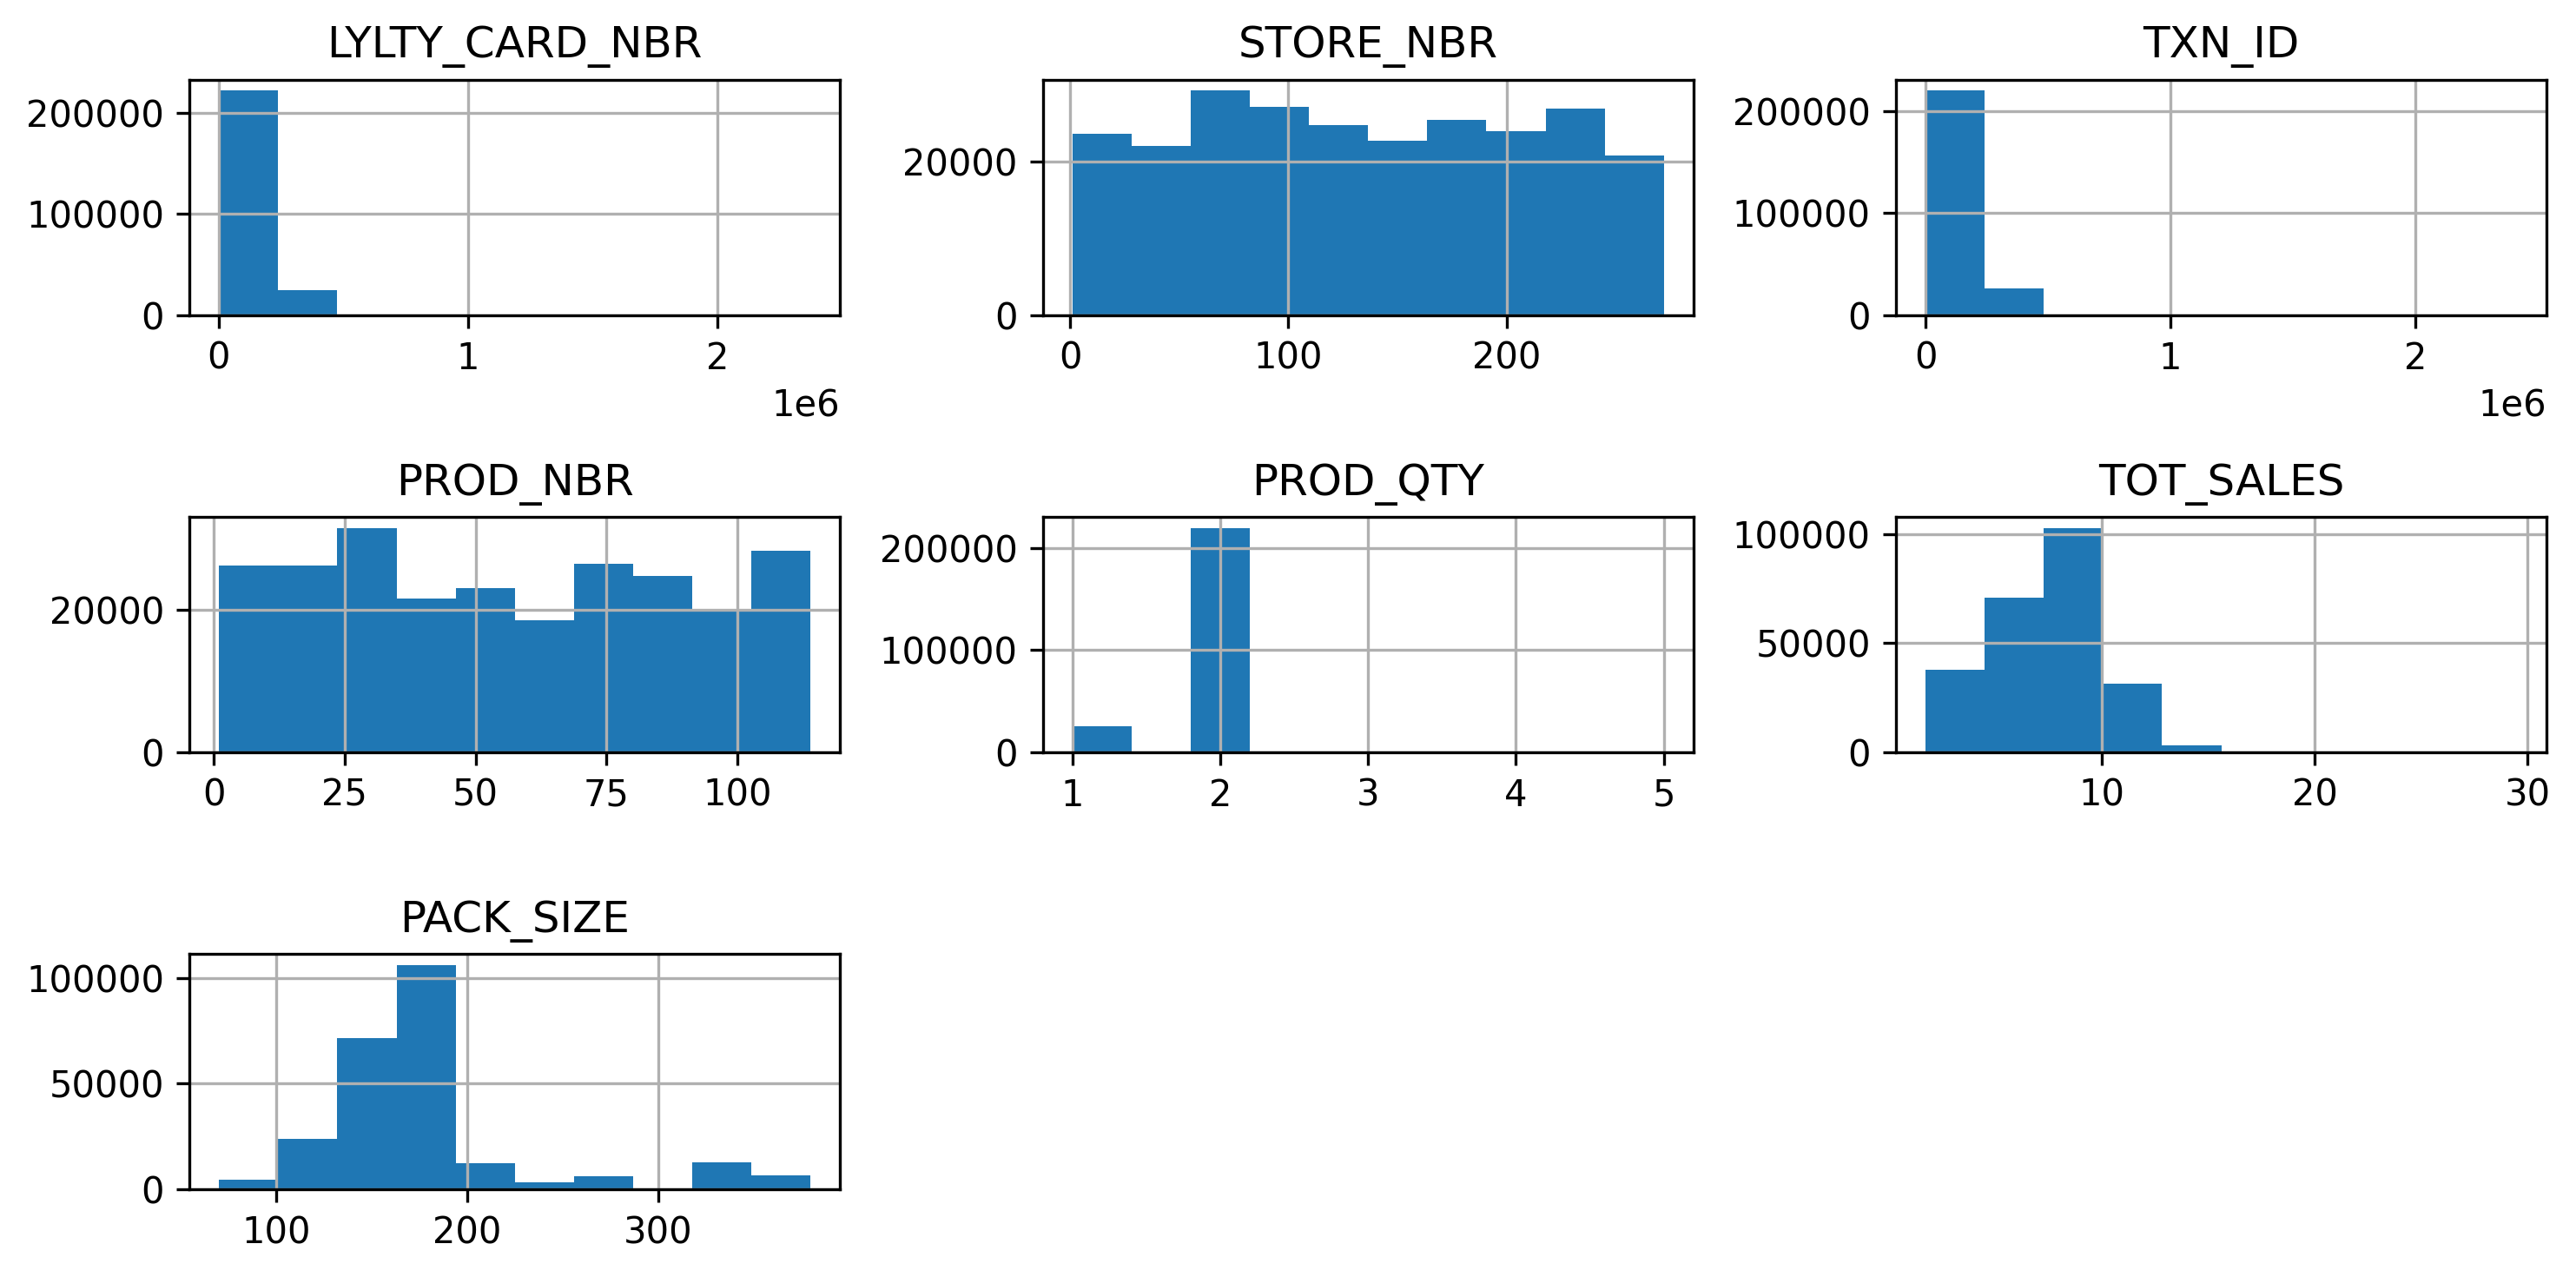

In [19]:
df.hist()                        #Histogram visualisation
plt.tight_layout()
plt.show()

<Axes: >

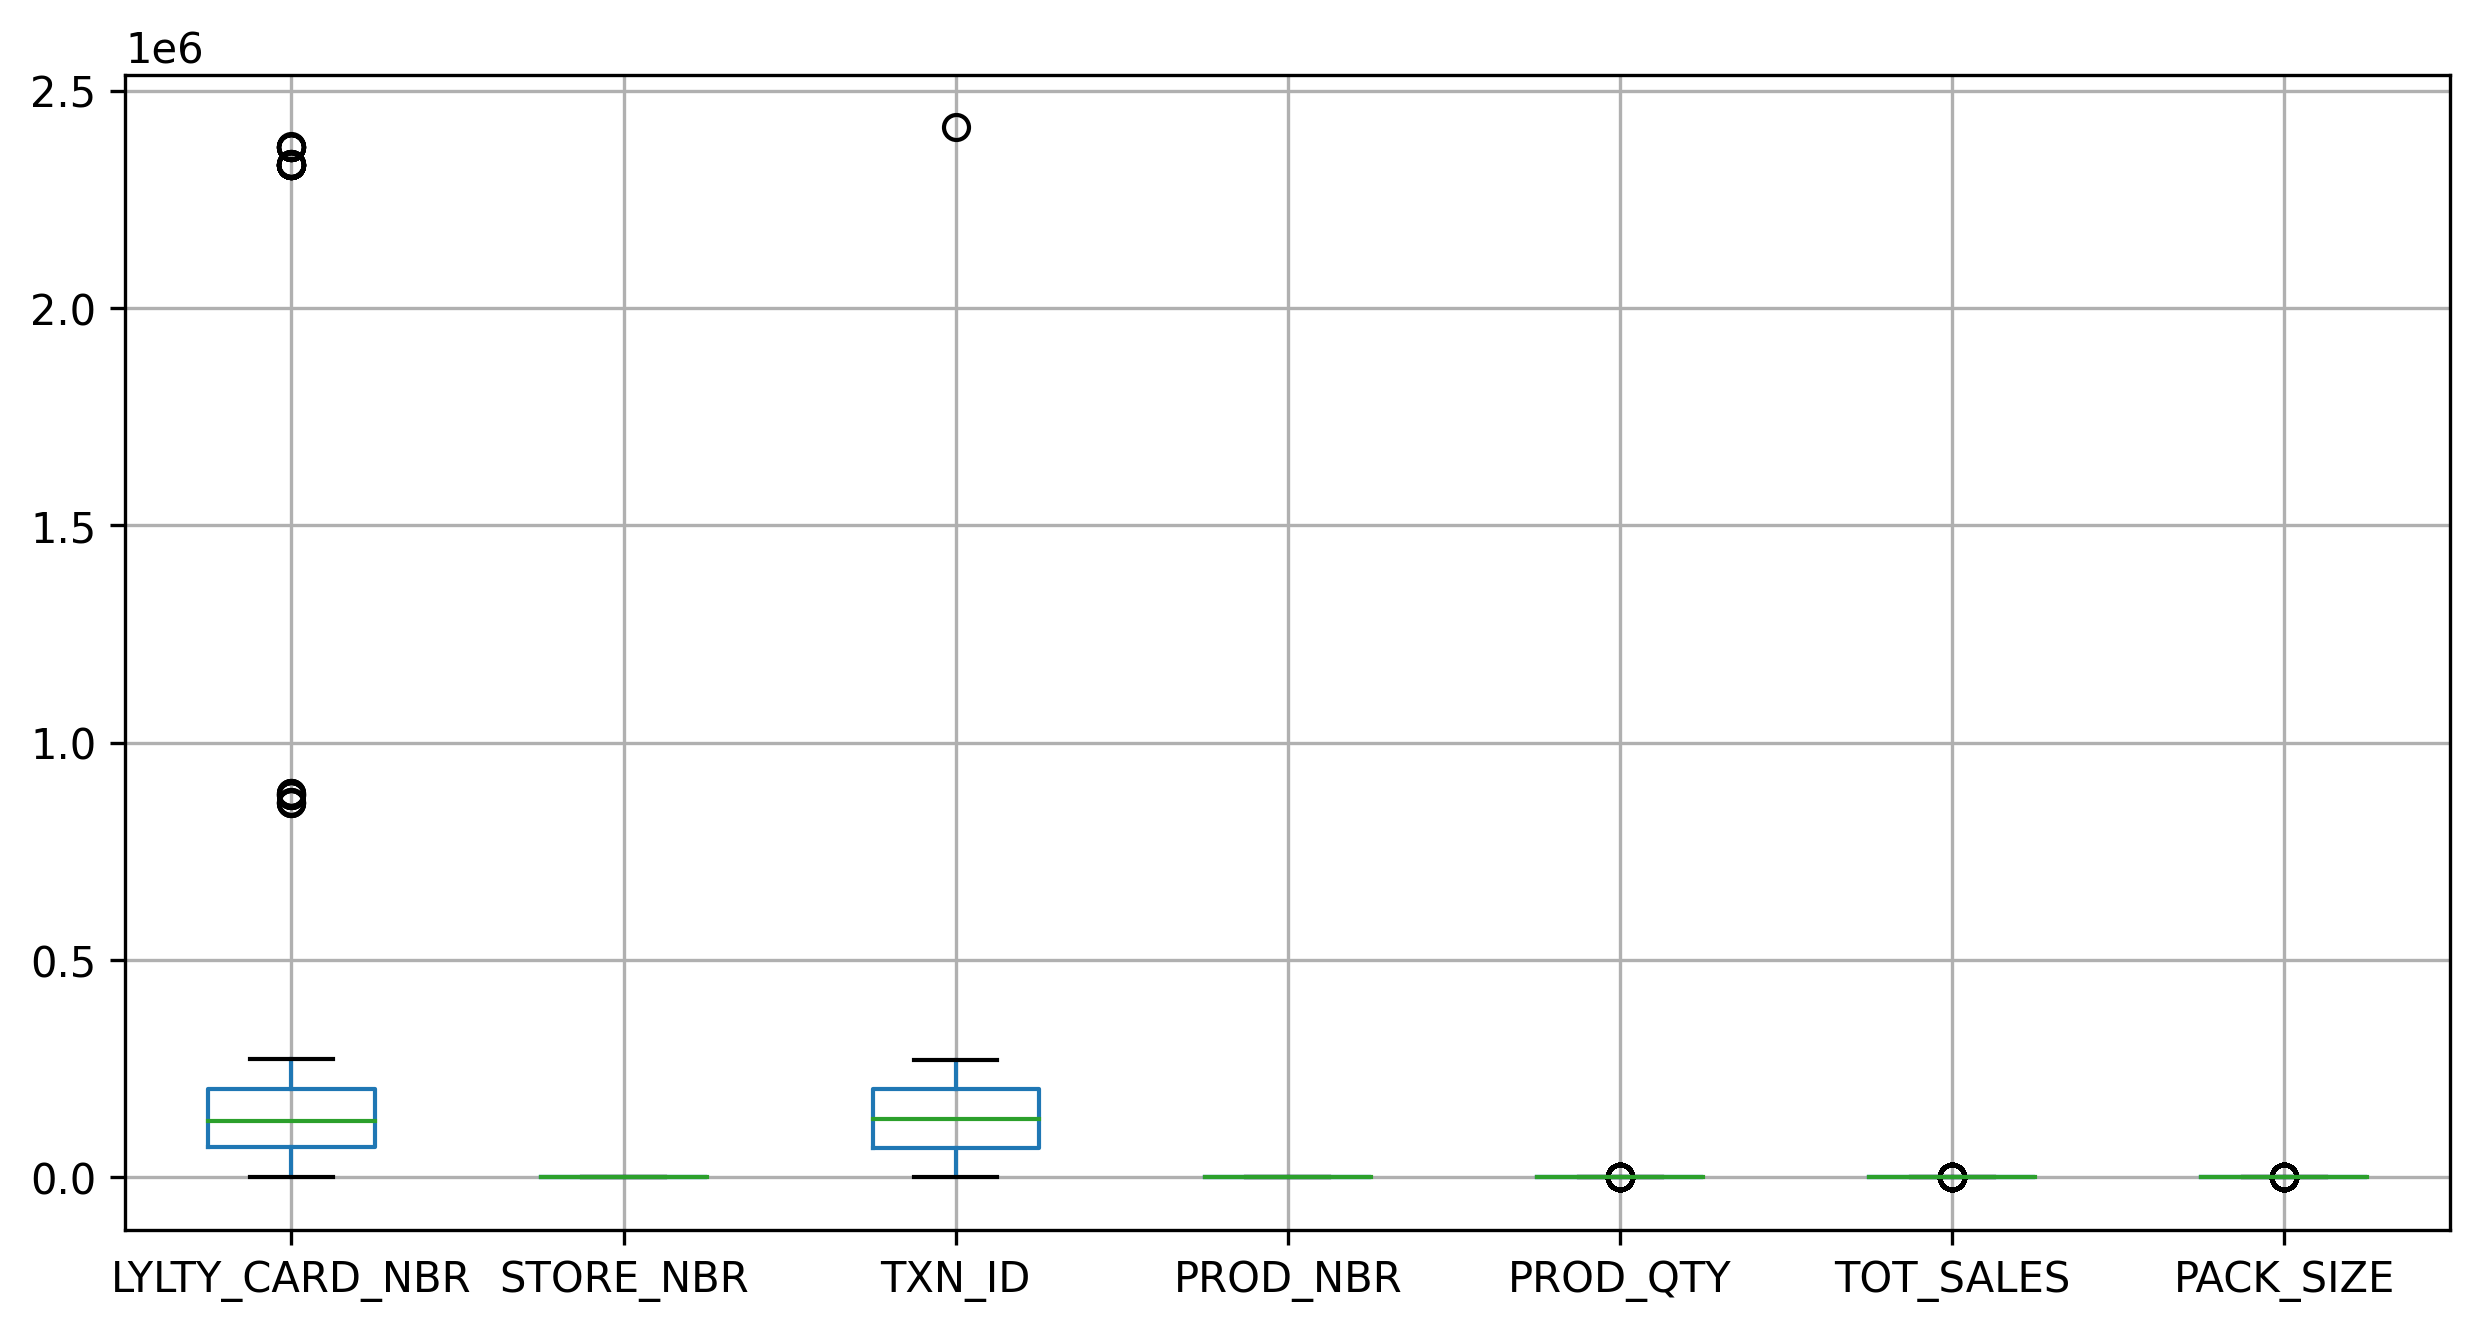

In [20]:
df.boxplot()                                  # boxplot visualisation

<Axes: xlabel='LYLTY_CARD_NBR'>

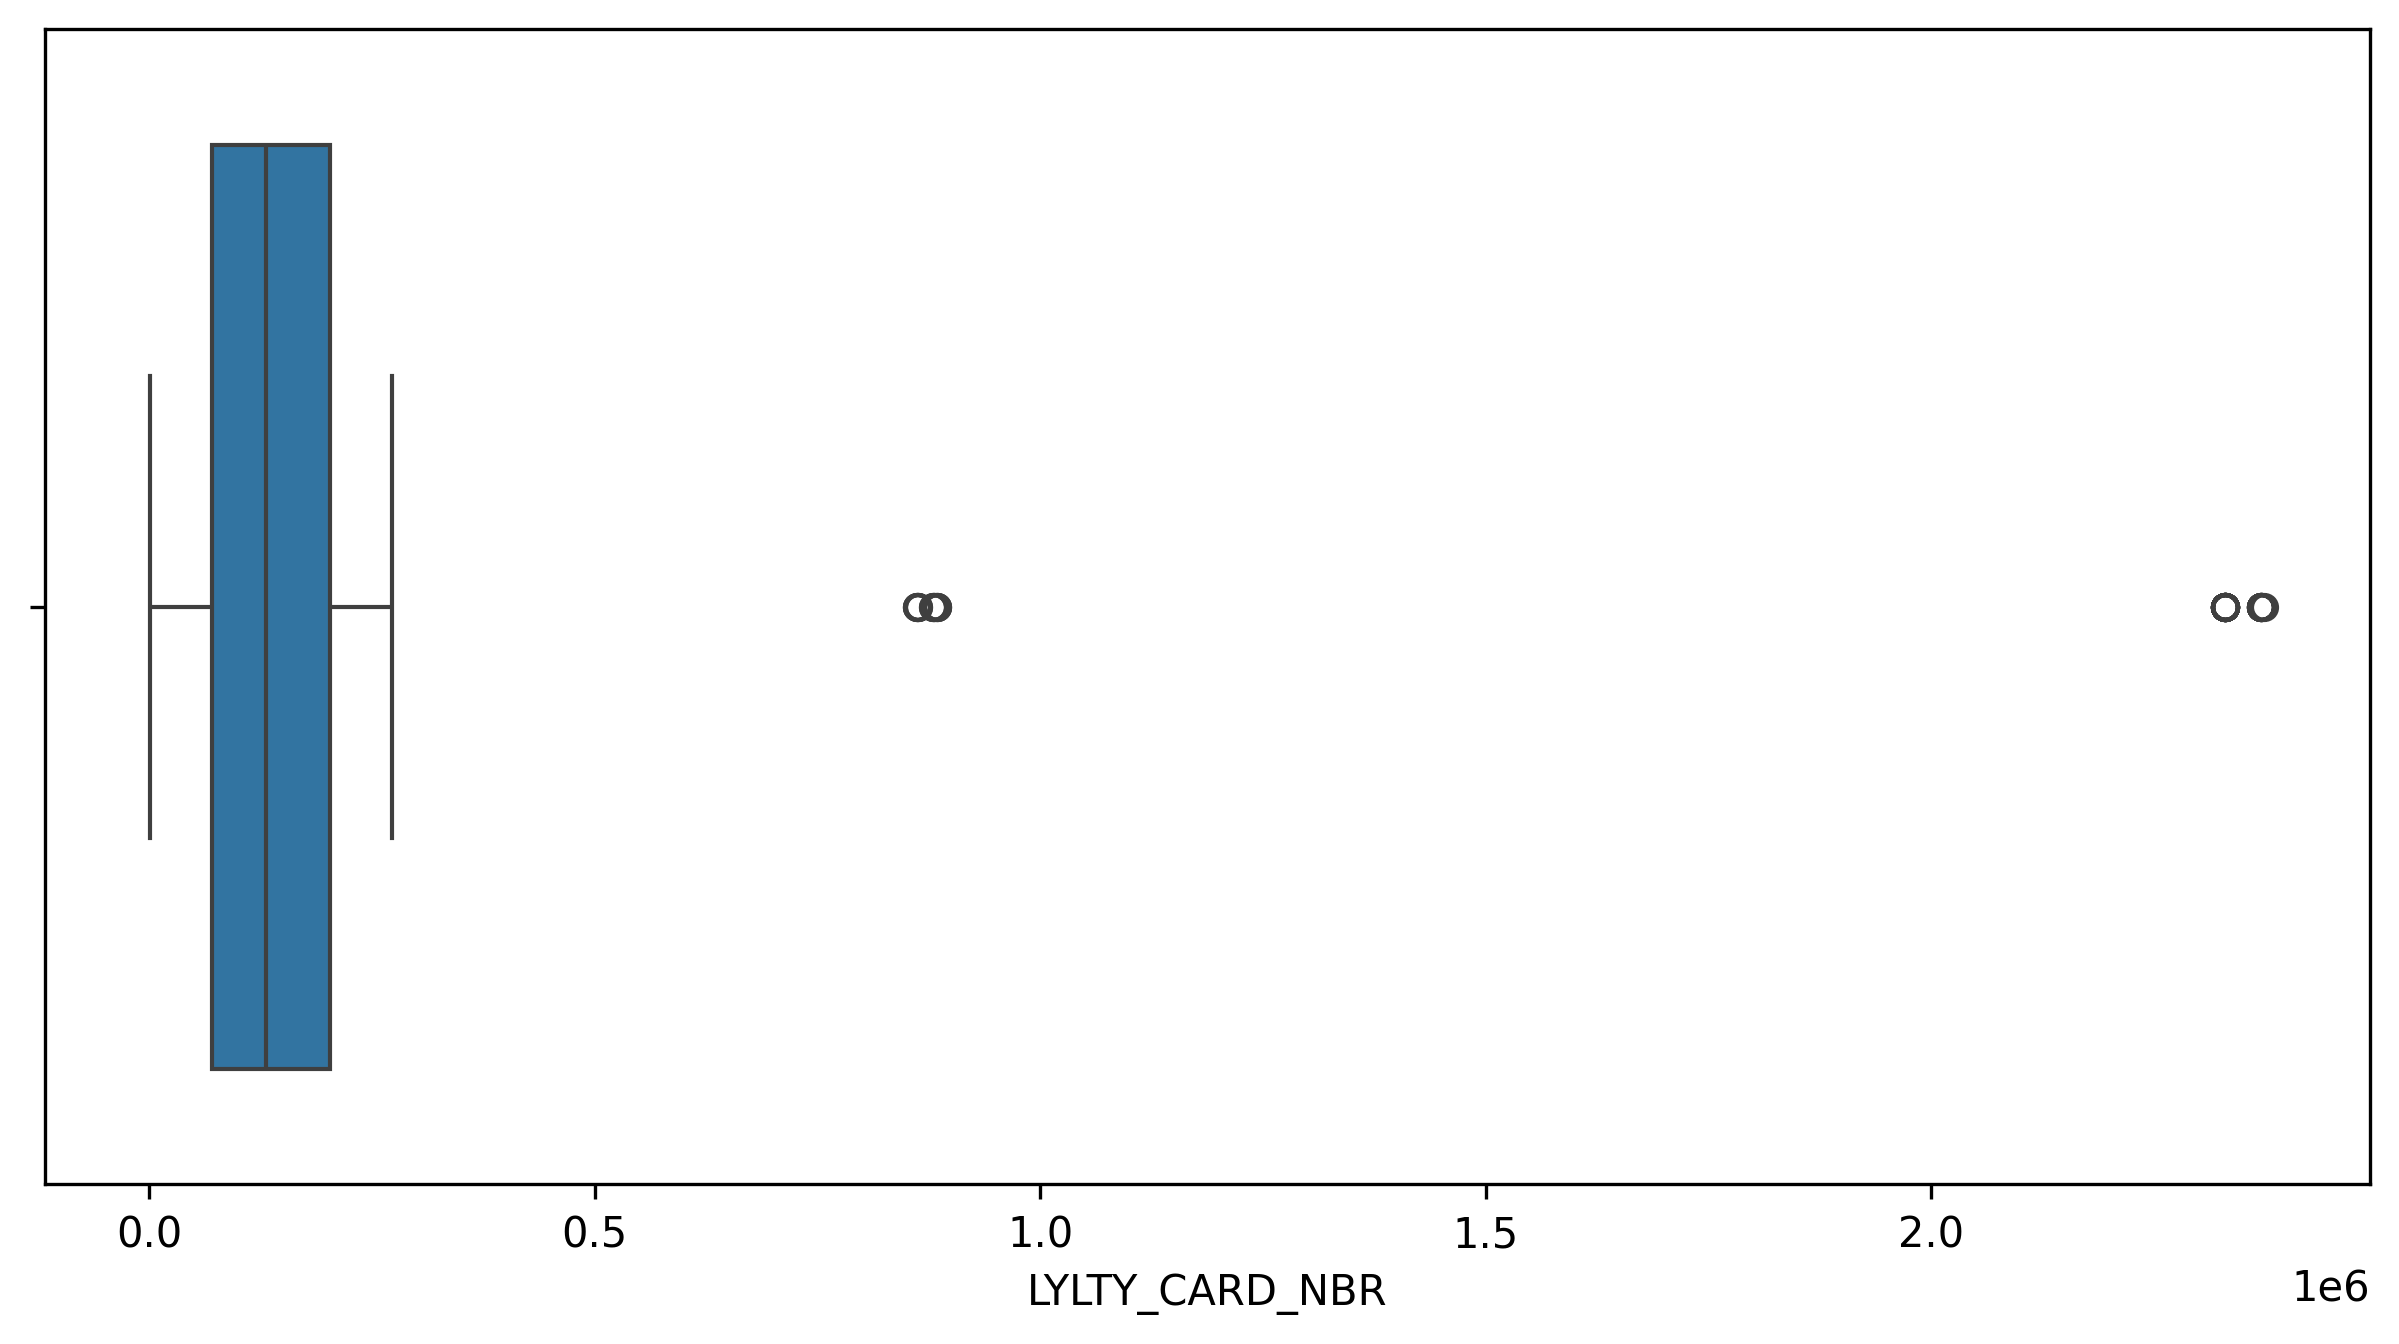

In [21]:
sns.boxplot(x = df['LYLTY_CARD_NBR'])                   #individual plots

<Axes: xlabel='PROD_QTY'>

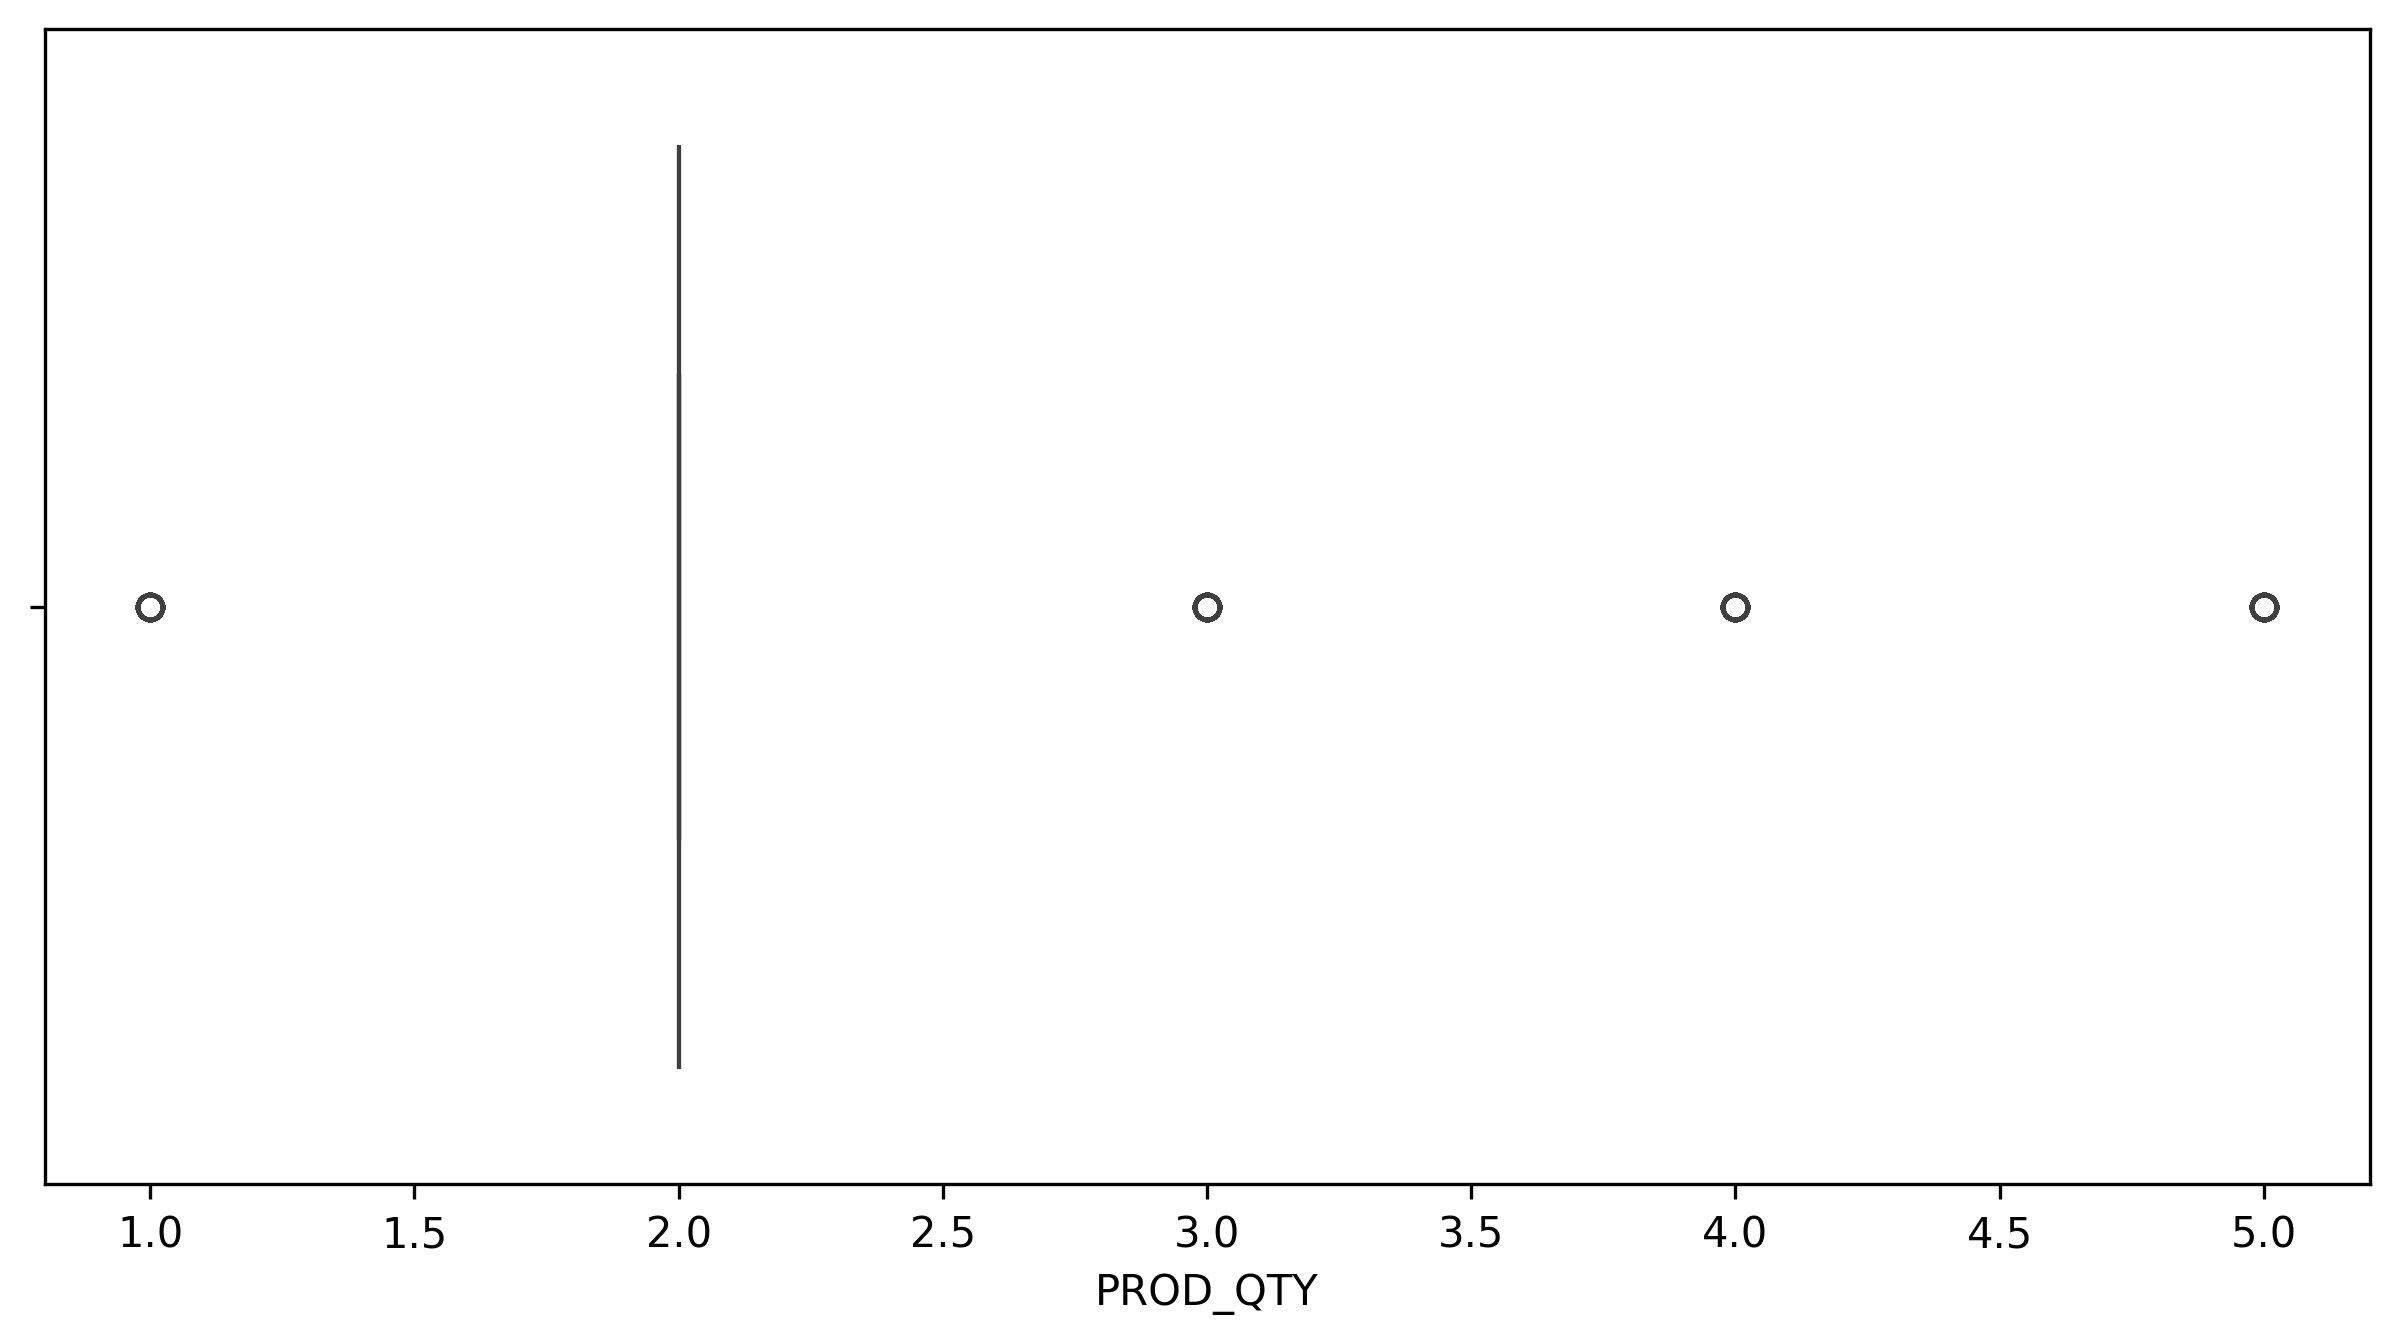

In [22]:
sns.boxplot(x = df['PROD_QTY'])

<Axes: xlabel='TOT_SALES'>

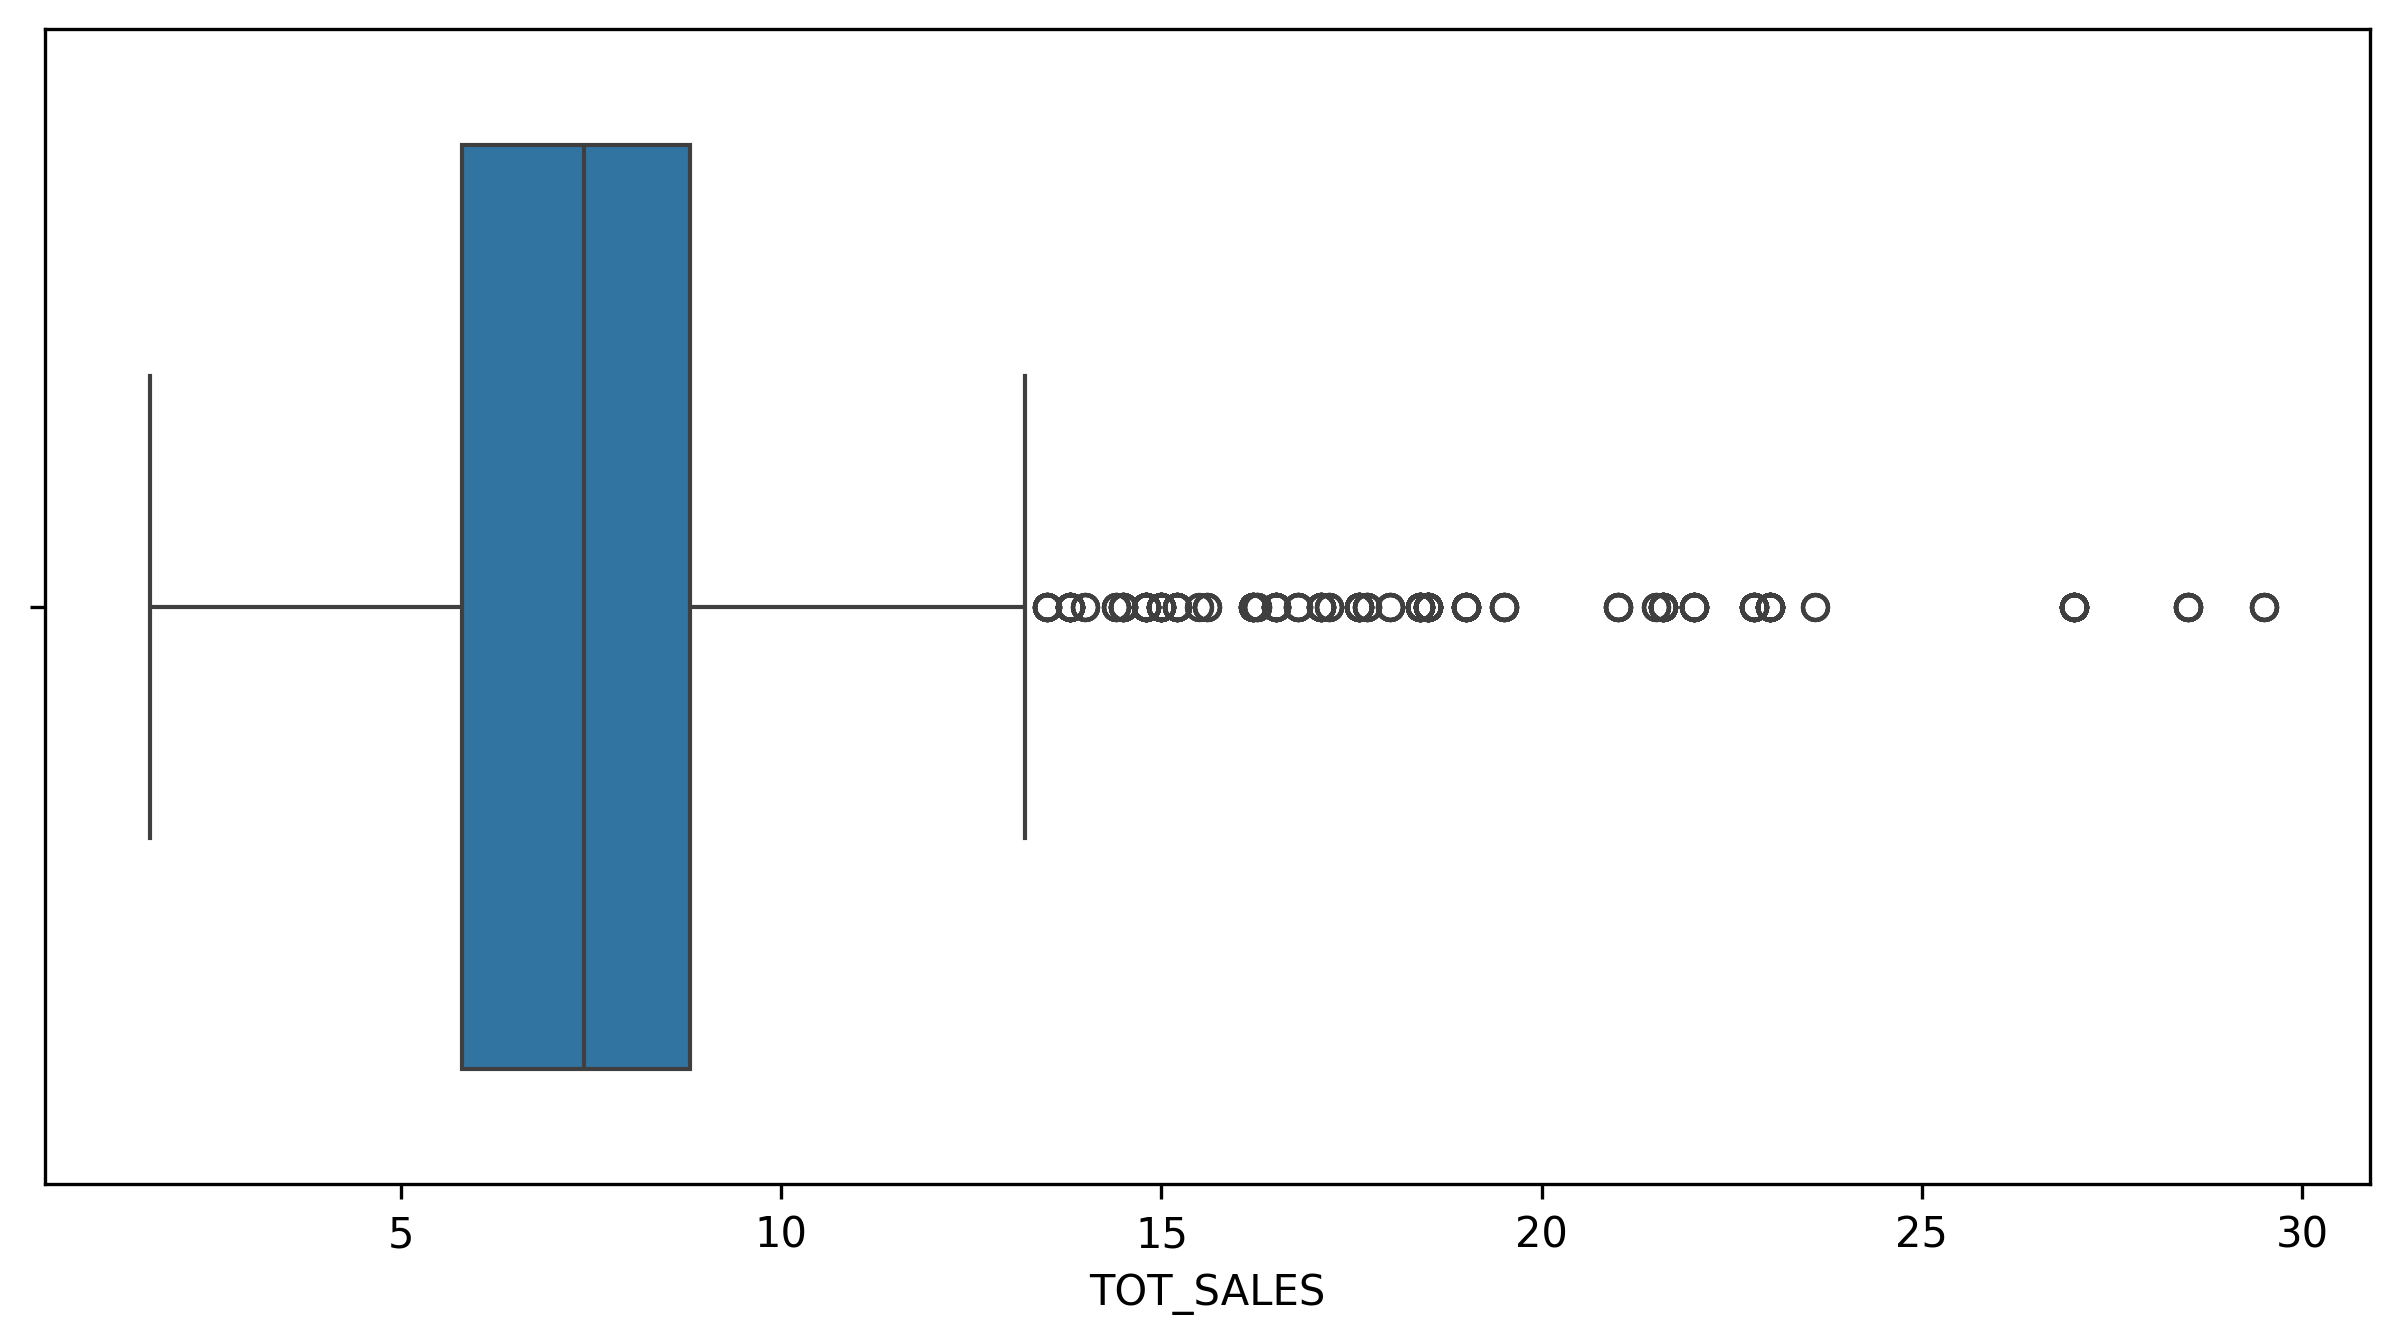

In [23]:
sns.boxplot(x = df['TOT_SALES'])

# **Outlier Treatment**

*   Capping: Replacing outlier values is called capping
*   In Capping all outlier values will be replaced by upper extreme



In [24]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [25]:
outlier_detection(df,'LYLTY_CARD_NBR')

(-129587.75, 402686.25)

In [26]:
outlier_detection(df,'PROD_QTY')

(2.0, 2.0)

In [27]:
outlier_detection(df,'TOT_SALES')

(1.299999999999998, 13.300000000000002)

In [28]:
df.loc[df['LYLTY_CARD_NBR']>402304.5,'LYLTY_CARD_NBR'] = 402304.5
df.loc[df['PROD_QTY']>2.0,'PROD_QTY'] = 2.0
df.loc[df['PROD_QTY']<2.0,'PROD_QTY'] = 2.0
df.loc[df['TOT_SALES']>13.300000000000002,'TOT_SALES'] = 13.300000000000002


<Axes: >

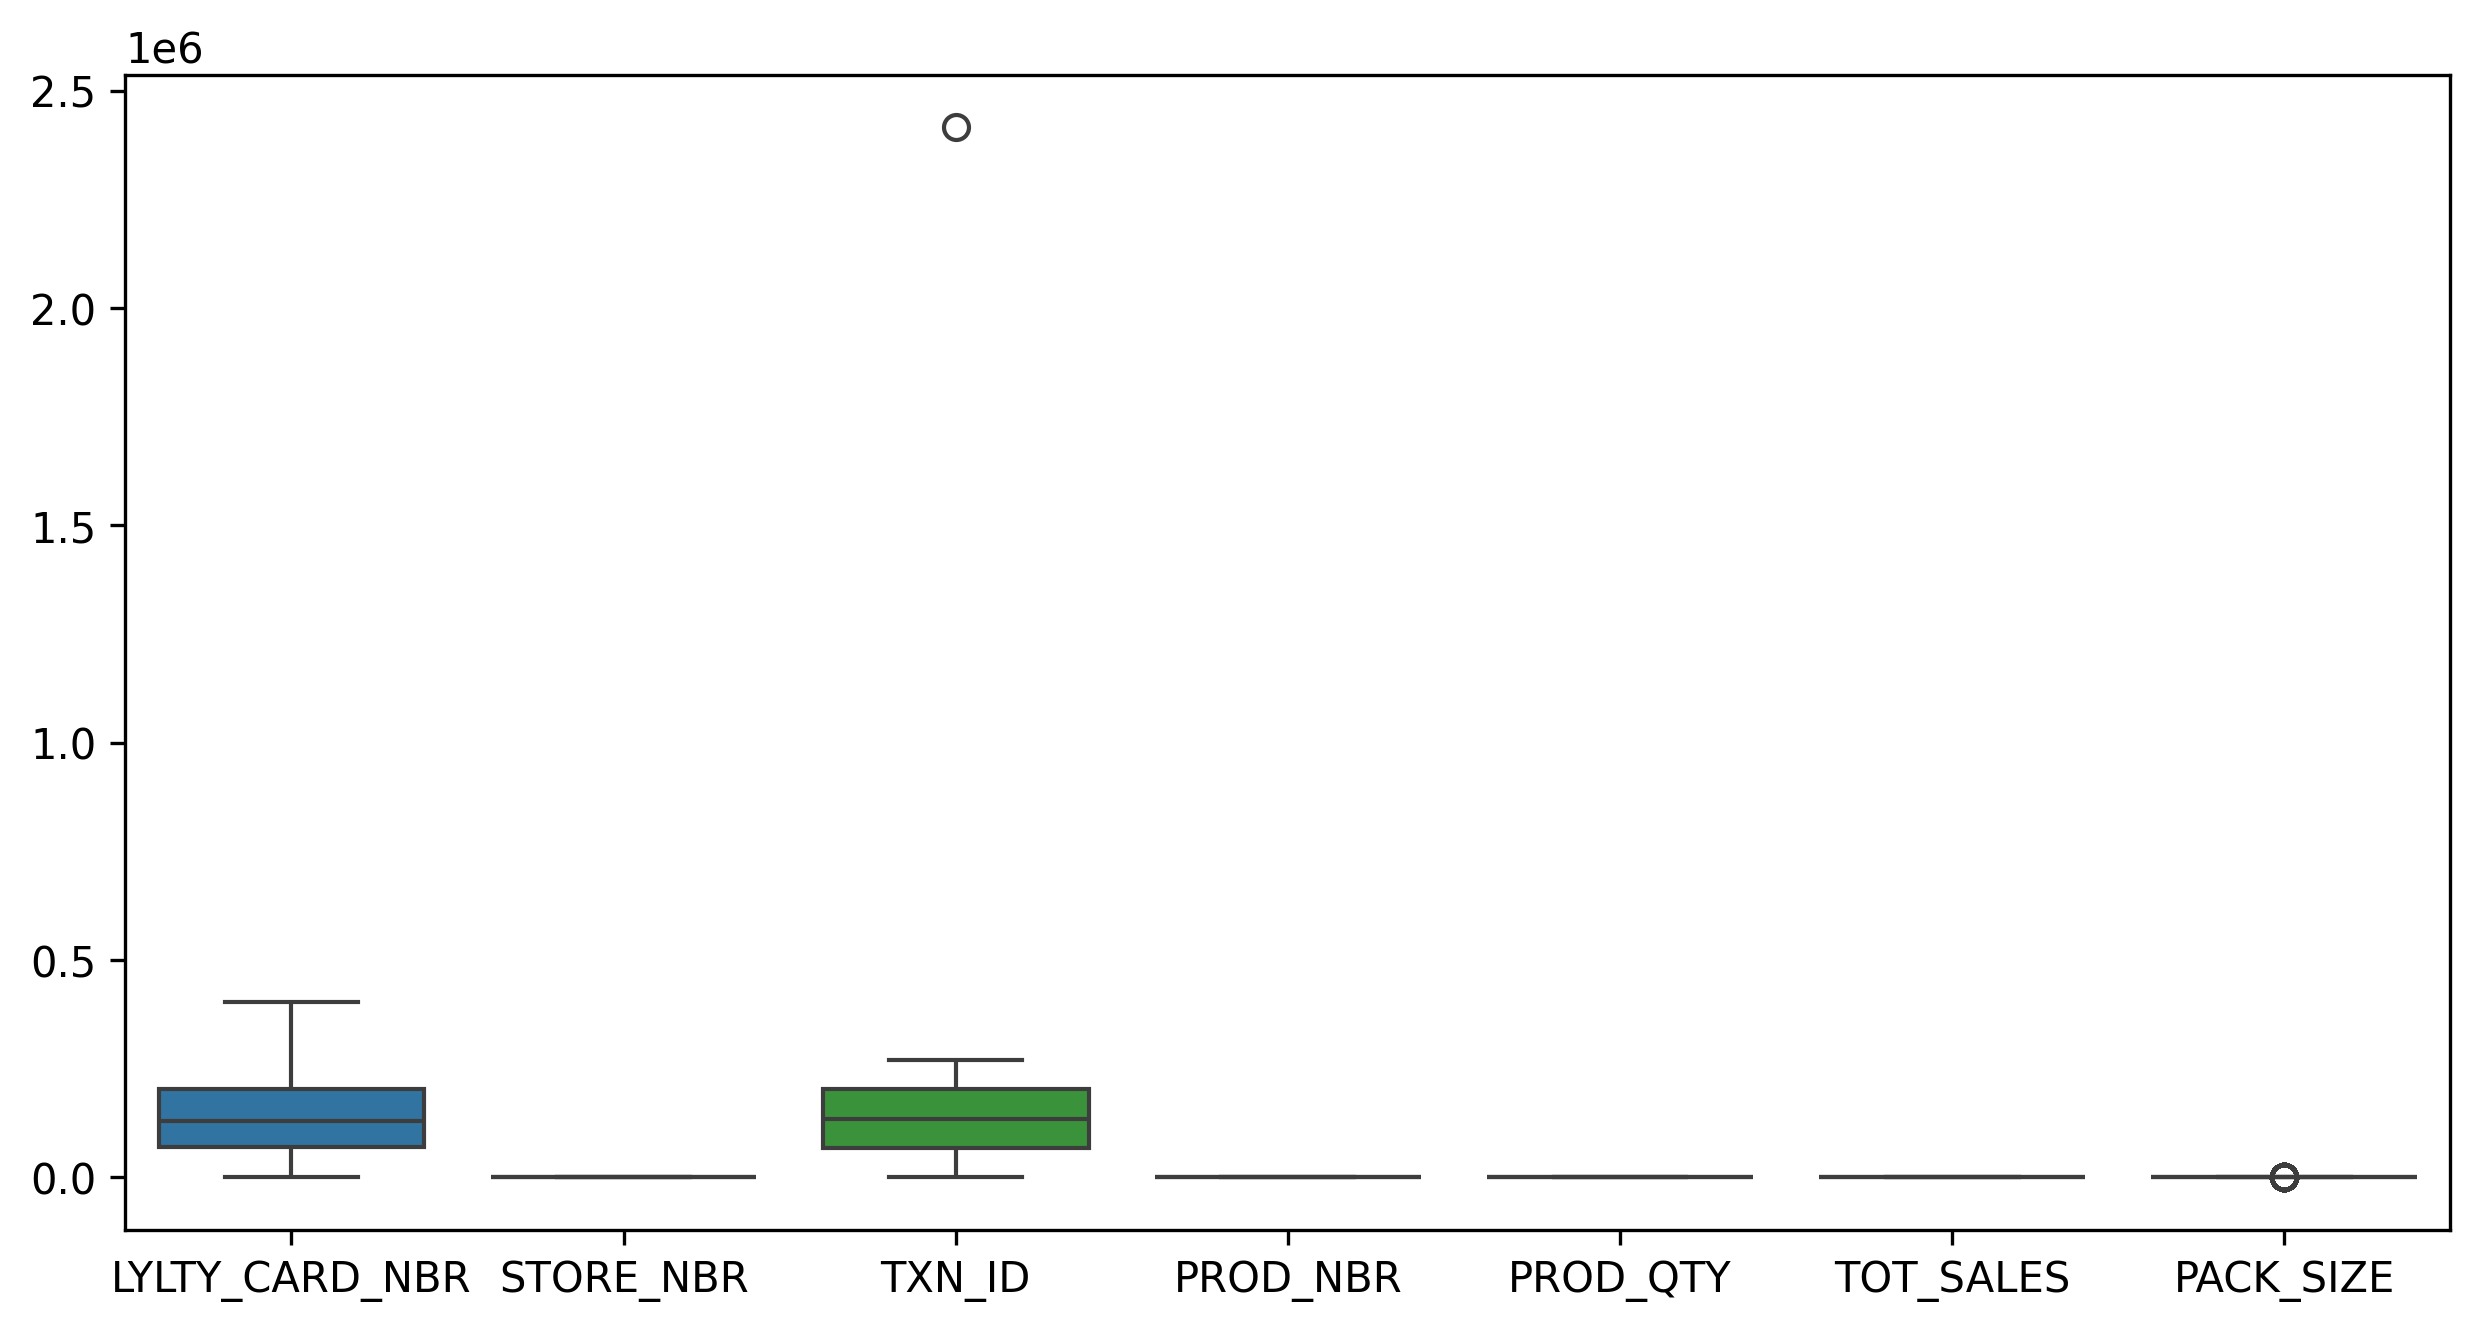

In [29]:
sns.boxplot(df)  #outliers are now treated

In [30]:
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000.0,17/10/2018,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002.0,16/09/2018,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,2,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003.0,07/03/2019,1,3,52,Grain Waves Sour CreamChives 210G,2,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003.0,08/03/2019,1,4,106,Natural ChipCo Hony Soy Chckn175g,2,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004.0,02/11/2018,1,5,96,WW Original Stacked Chips 160g,2,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,402304.5,03/08/2018,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
264829,402304.5,08/12/2018,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,402304.5,01/10/2018,88,240394,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,402304.5,24/10/2018,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget


In [31]:
transaction_count_by_date = df.groupby('DATE')['PROD_QTY'].sum().sort_values(ascending=True)
print(transaction_count_by_date)

DATE
13/06/2019    1214
22/09/2018    1218
25/11/2018    1220
18/10/2018    1222
24/06/2019    1224
              ... 
20/12/2018    1616
19/12/2018    1678
22/12/2018    1680
23/12/2018    1706
24/12/2018    1730
Name: PROD_QTY, Length: 364, dtype: int64


In [32]:
df['DATE'] = pd.to_datetime(df['DATE'])

transaction_count_by_month = df.groupby(df['DATE'].dt.month)['PROD_QTY'].sum().sort_values(ascending=True)
print(transaction_count_by_month)

DATE
2     38010
4     40562
9     40592
11    40706
6     40724
1     41220
10    41542
5     41664
8     41728
7     42032
3     42248
12    42450
Name: PROD_QTY, dtype: int64


# **Visualisation in different categories**

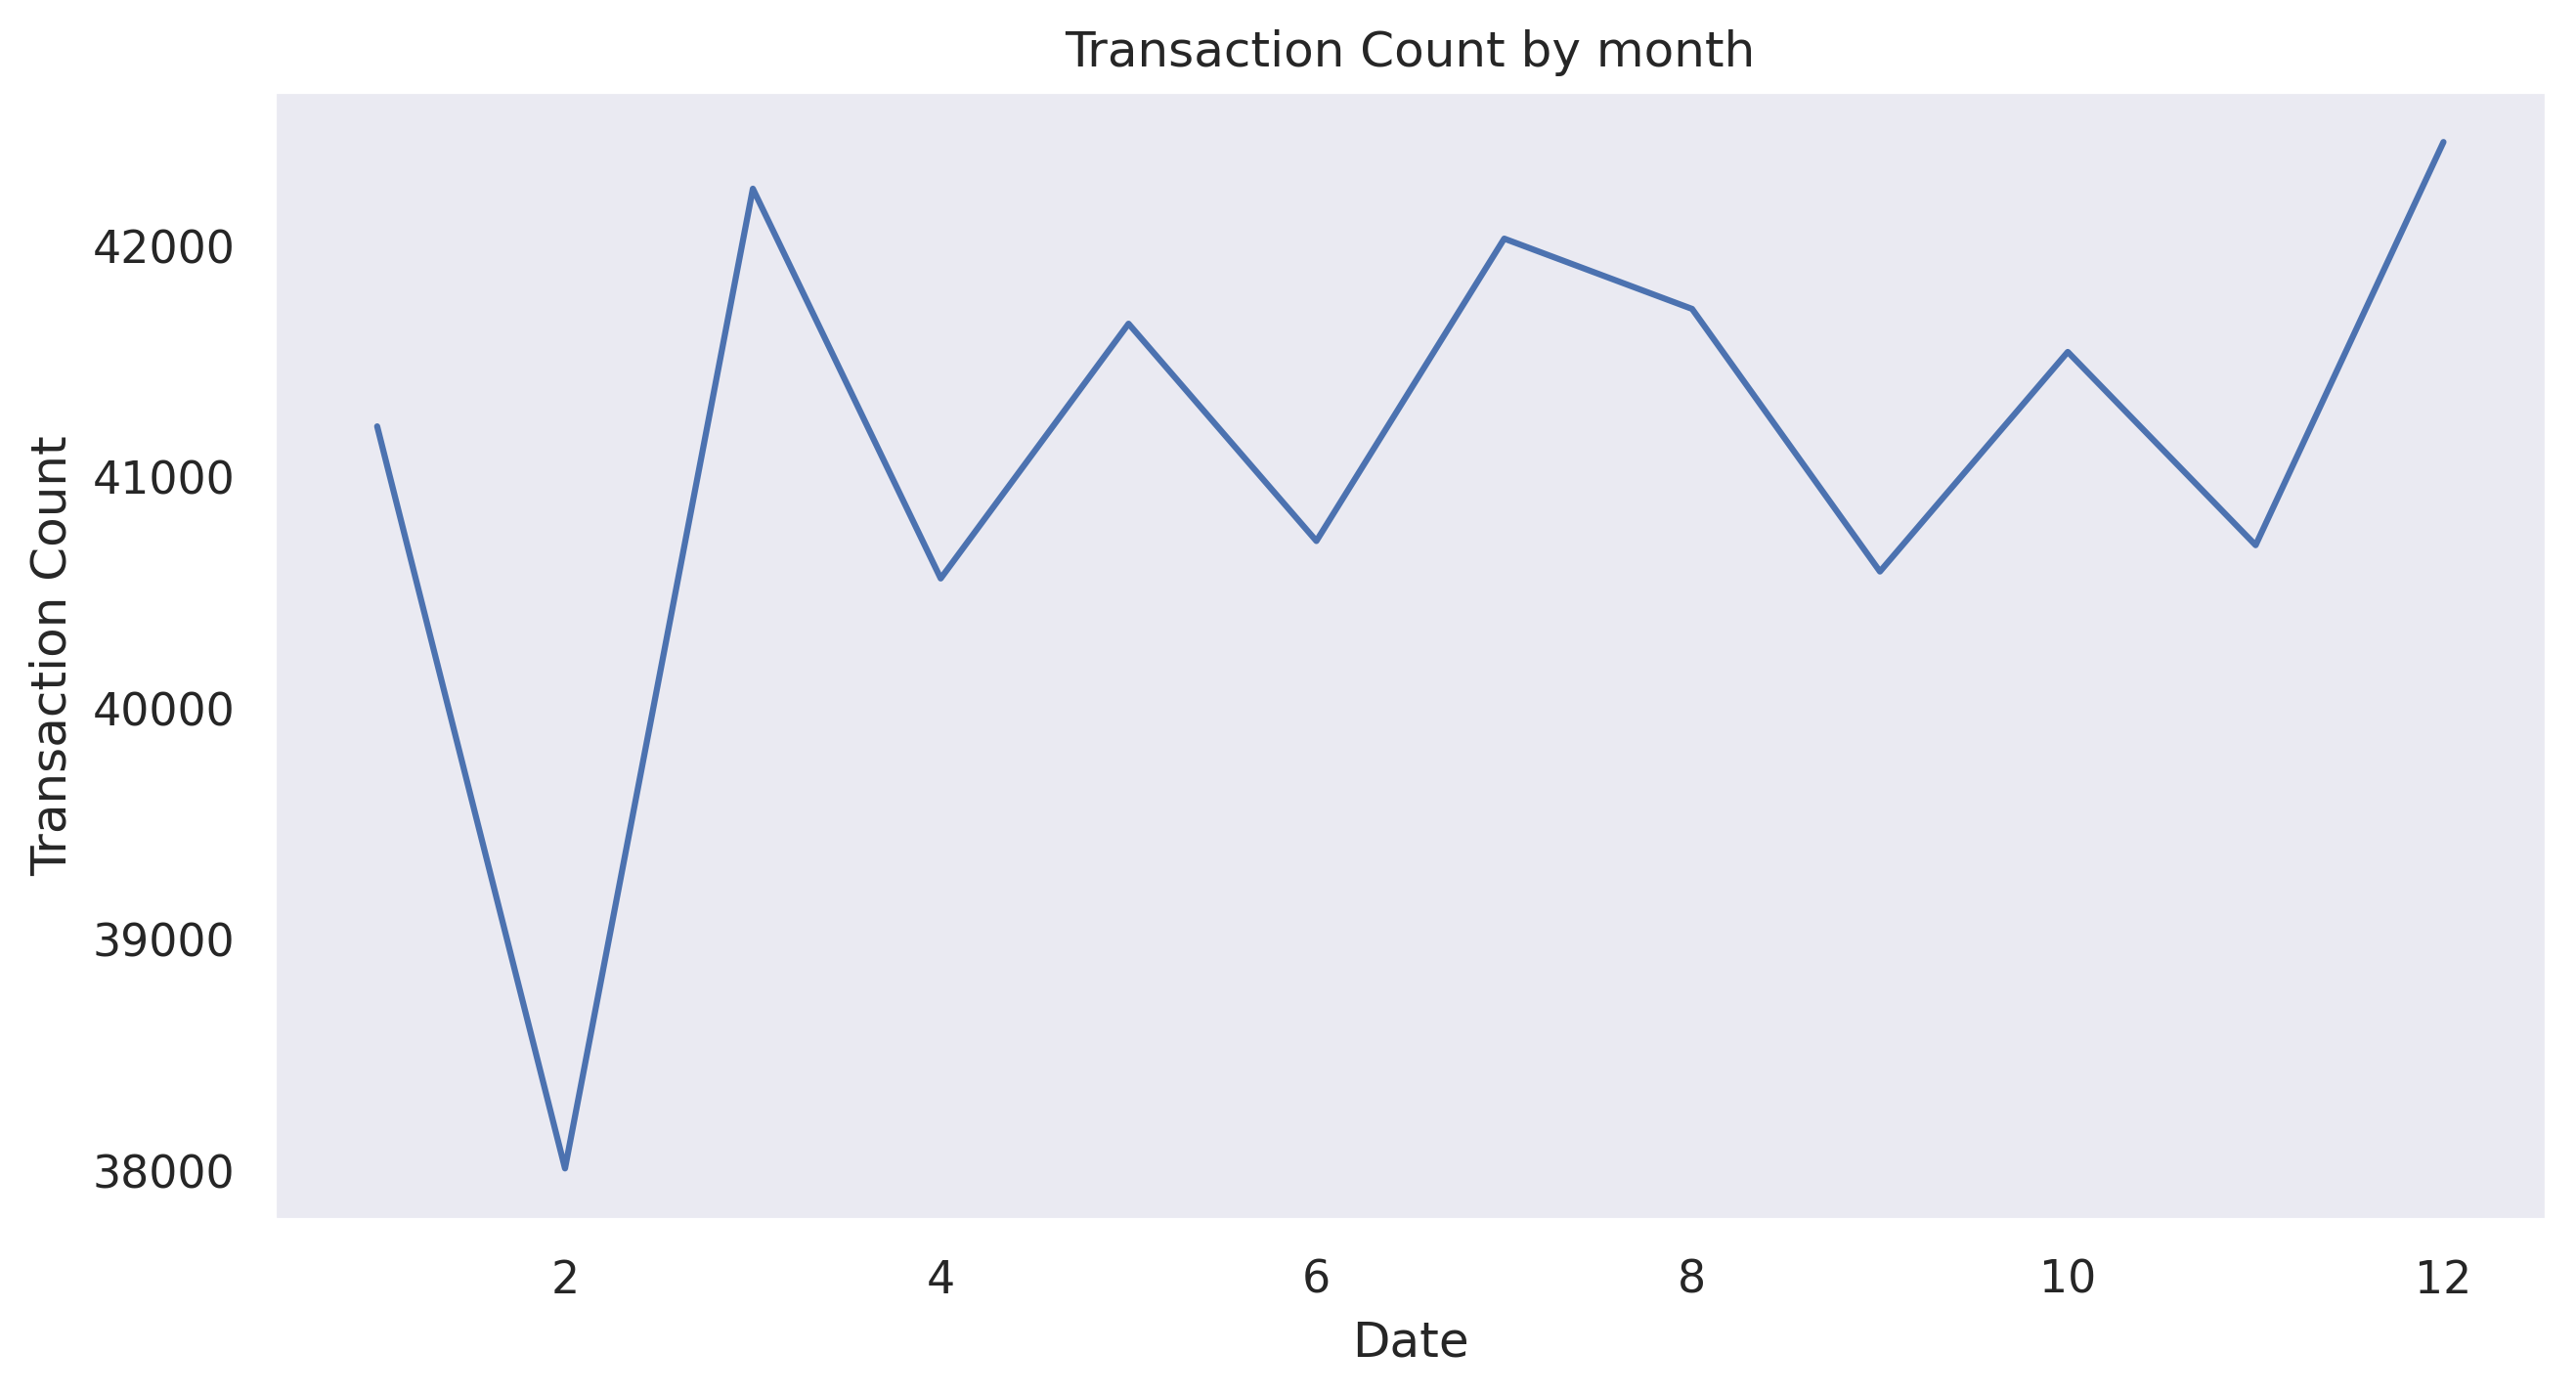

In [33]:
sns.set_theme(style="dark")
sns.lineplot(x=transaction_count_by_month.index, y=transaction_count_by_month.values)
plt.title('Transaction Count by month')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

In [34]:
# Filter the DataFrame to only include transactions in December
december_df = df[df['DATE'].dt.month == 12]

# Group the DataFrame by day and calculate the sum of PROD_QTY for each day
transaction_count_by_day = december_df.groupby('DATE')['PROD_QTY'].sum().sort_values(ascending=True)

# Print the transaction count by day
print(transaction_count_by_day)

DATE
2018-12-08    1244
2018-12-12    1248
2018-12-06    1290
2018-12-31    1300
2018-12-02    1310
2018-12-09    1318
2018-12-05    1320
2018-12-10    1328
2018-12-29    1332
2018-12-04    1332
2018-12-13    1336
2018-12-28    1338
2018-12-15    1342
2018-12-07    1344
2018-12-01    1350
2018-12-03    1354
2018-12-30    1372
2018-12-11    1372
2018-12-27    1380
2018-12-14    1394
2018-12-26    1400
2018-12-16    1418
2018-12-17    1458
2018-12-21    1562
2018-12-18    1598
2018-12-20    1616
2018-12-19    1678
2018-12-22    1680
2018-12-23    1706
2018-12-24    1730
Name: PROD_QTY, dtype: int64


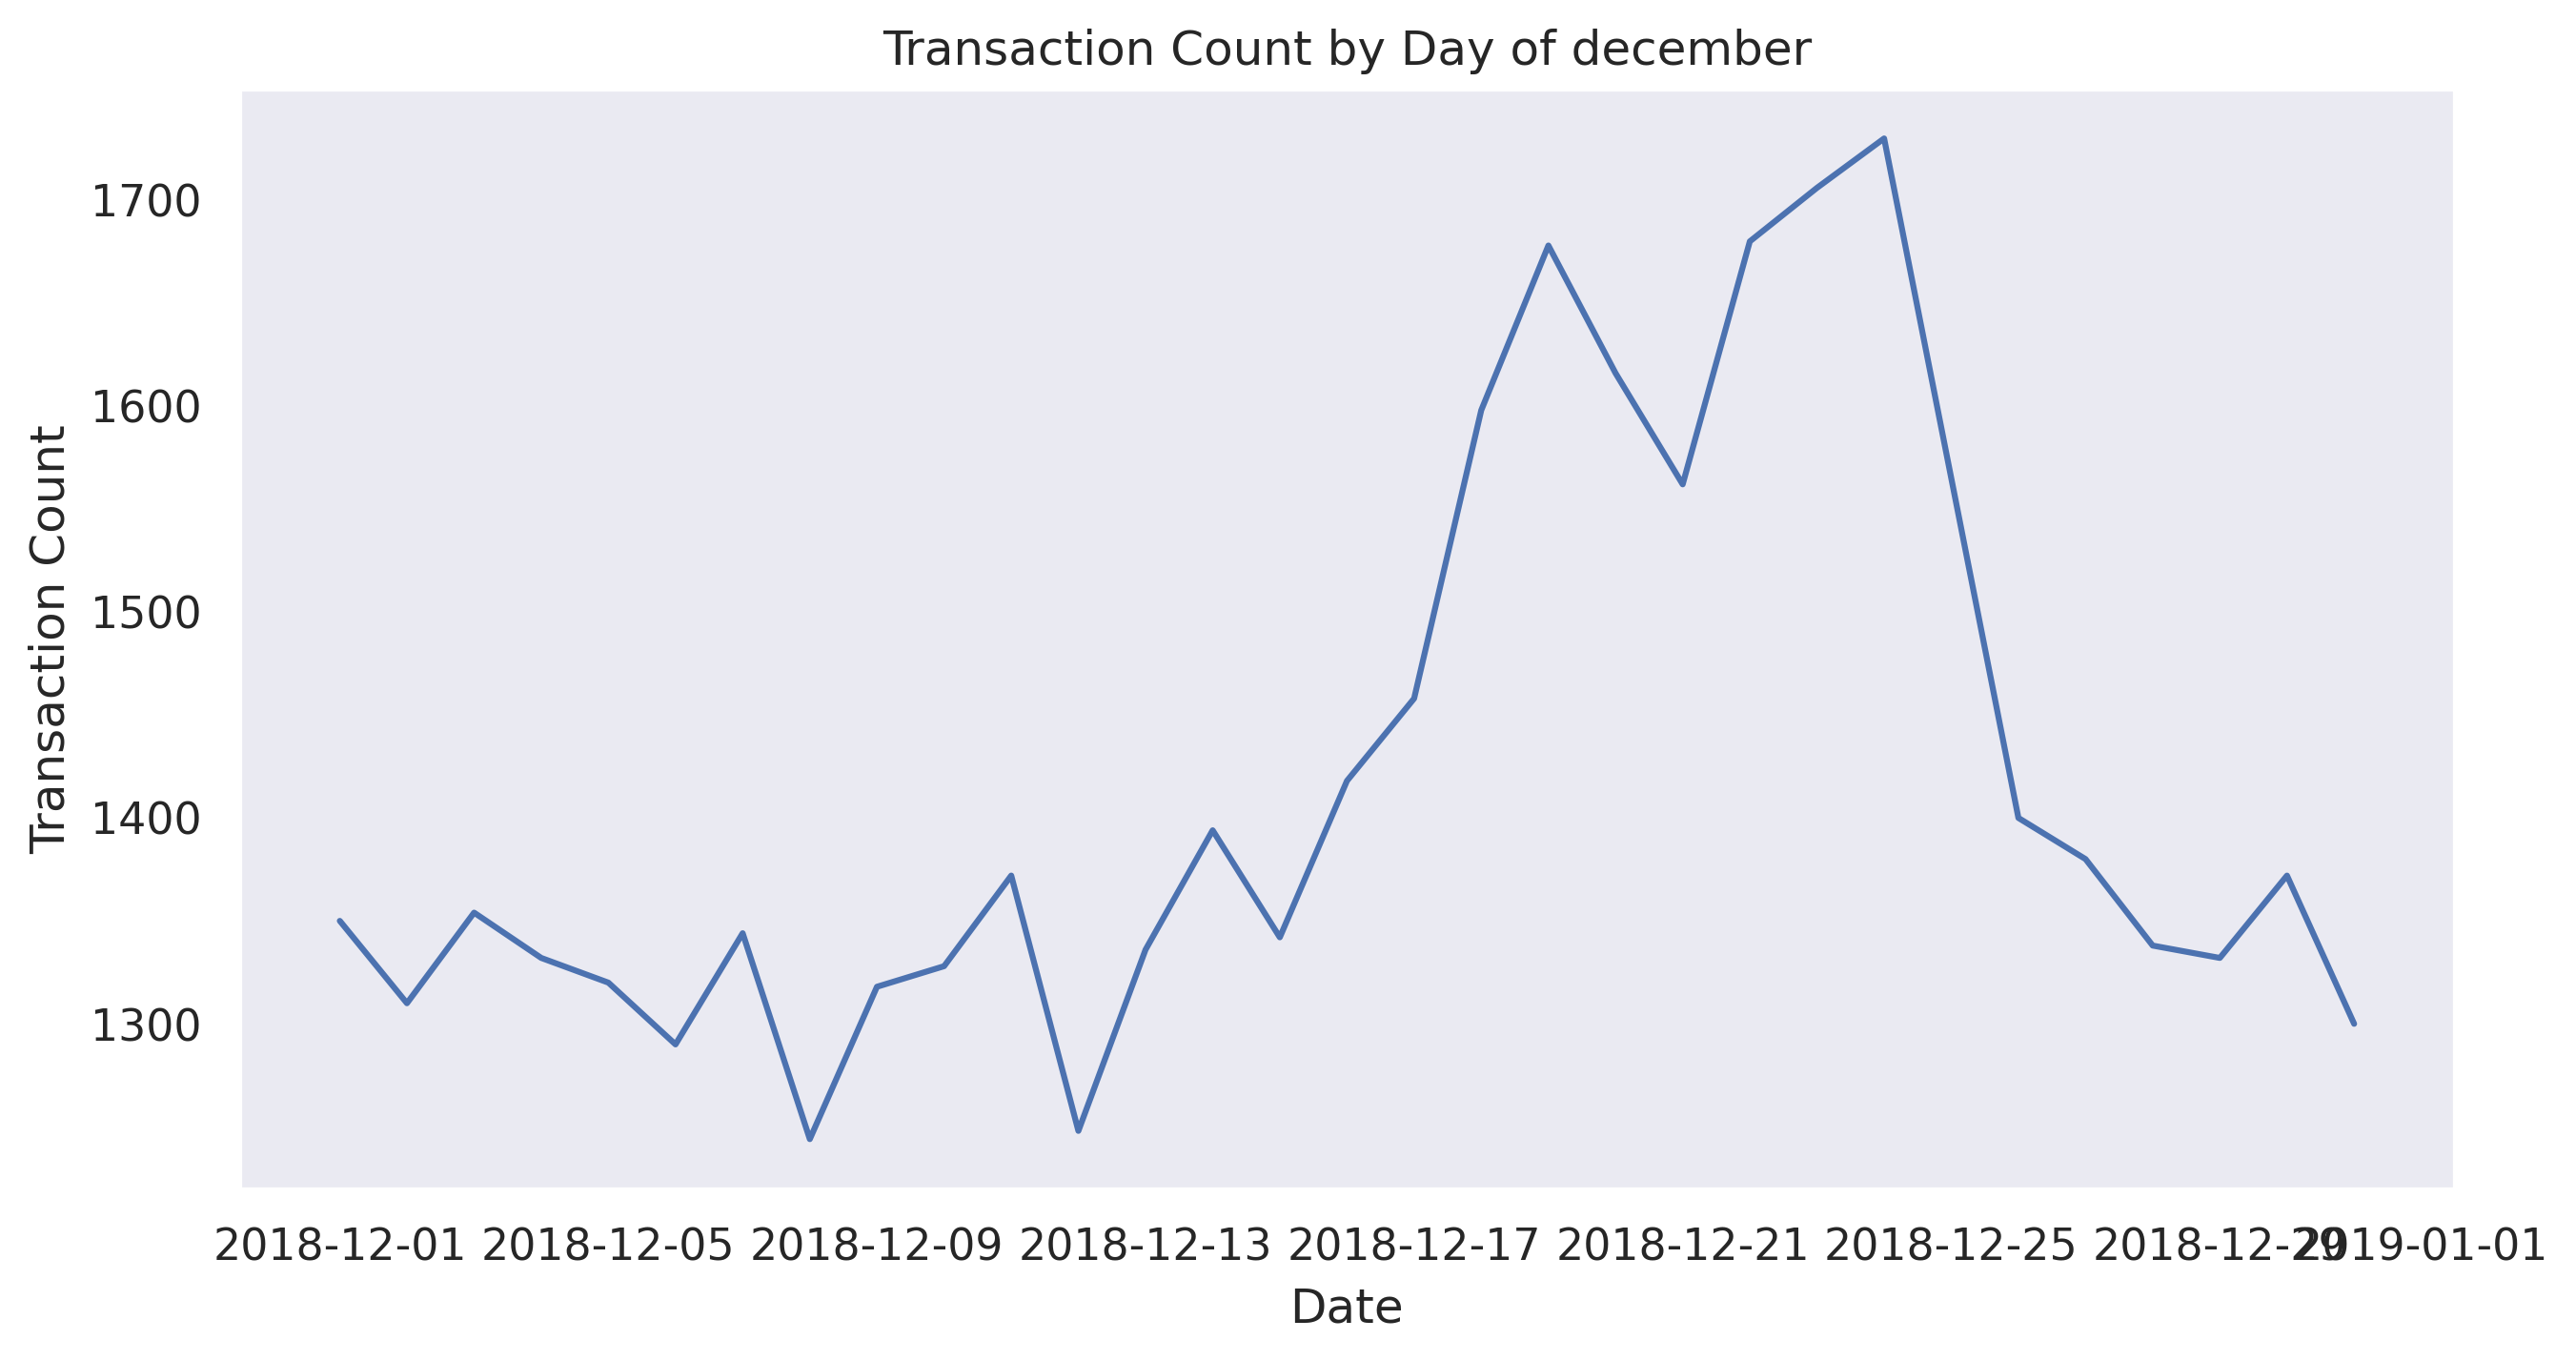

In [35]:
sns.set_theme(style="dark")
sns.lineplot(x=transaction_count_by_day.index, y=transaction_count_by_day.values)
plt.title('Transaction Count by Day of december')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

In [36]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [37]:
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000.0,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002.0,2018-09-16,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,2,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003.0,2019-03-07,1,3,52,Grain Waves Sour CreamChives 210G,2,3.6,210.0,GRNWVES,YOUNG FAMILIES,Budget
3,1003.0,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,2,3.0,175.0,NATURAL,YOUNG FAMILIES,Budget
4,1004.0,2018-11-02,1,5,96,WW Original Stacked Chips 160g,2,1.9,160.0,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264828,402304.5,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream
264829,402304.5,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210.0,GRNWVES,YOUNG FAMILIES,Mainstream
264830,402304.5,2018-10-01,88,240394,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150.0,KETTLE,YOUNG FAMILIES,Premium
264831,402304.5,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,TYRRELLS,OLDER FAMILIES,Budget


In [38]:
df['PACK_SIZE'].unique()

array([175., 150., 210., 160., 165., 110., 330., 170., 180., 135.,  70.,
       220., 190., 270.,  90., 200., 134., 380., 125., 250.])

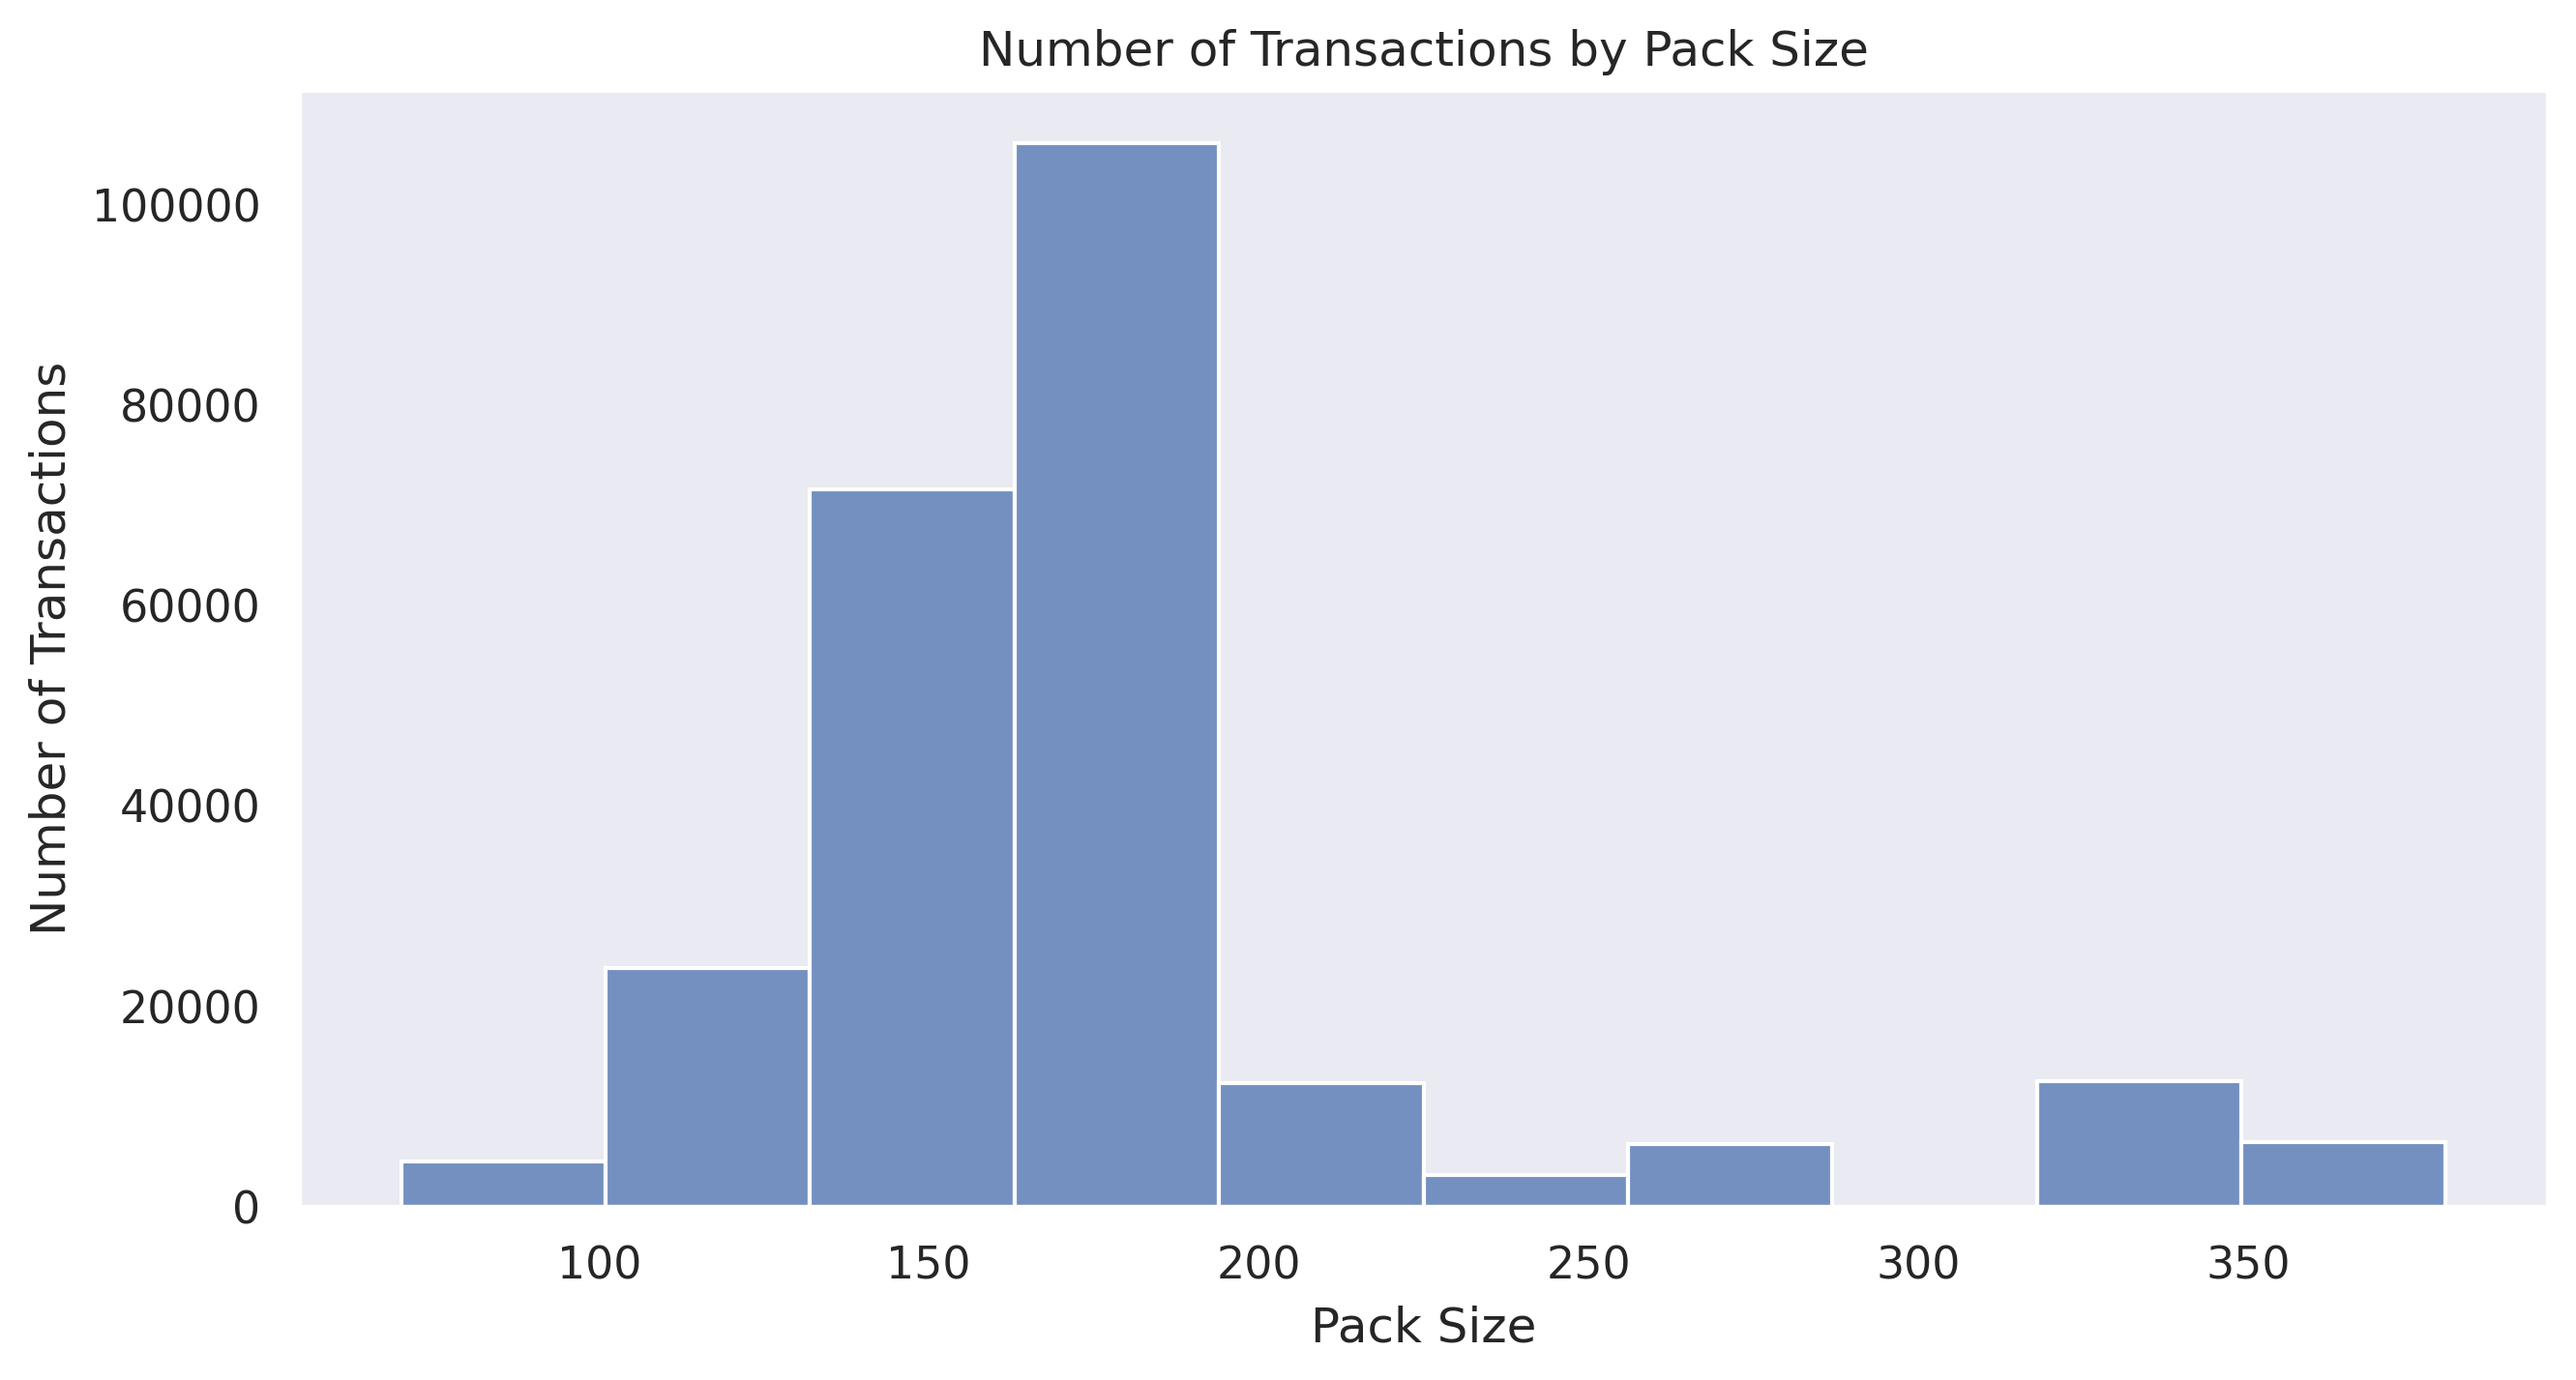

In [39]:

import matplotlib.pyplot as plt
sns.histplot(data=df, x='PACK_SIZE', bins=10)
plt.title('Number of Transactions by Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Number of Transactions')
plt.show()

In [40]:
df['BRAND_NAME'] = df['PROD_NAME'].str.split().str.get(0)
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME
0,1000.0,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,Natural
1,1002.0,2018-09-16,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,2,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream,Red
2,1003.0,2019-03-07,1,3,52,Grain Waves Sour CreamChives 210G,2,3.6,210.0,GRNWVES,YOUNG FAMILIES,Budget,Grain
3,1003.0,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,2,3.0,175.0,NATURAL,YOUNG FAMILIES,Budget,Natural
4,1004.0,2018-11-02,1,5,96,WW Original Stacked Chips 160g,2,1.9,160.0,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,WW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,402304.5,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream,Dorito
264829,402304.5,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210.0,GRNWVES,YOUNG FAMILIES,Mainstream,Grain
264830,402304.5,2018-10-01,88,240394,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150.0,KETTLE,YOUNG FAMILIES,Premium,Kettle
264831,402304.5,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,TYRRELLS,OLDER FAMILIES,Budget,Tyrrells


In [41]:
df['BRAND_NAME'].unique()

array(['Natural', 'Red', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'RRD',
       'Doritos', 'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos',
       'Cobs', 'Burger', 'Woolworths', 'Thins', 'Tyrrells', 'Smith',
       'Cheezels', 'Twisties', 'Sunbites', 'Snbts', 'Pringles', 'French',
       'Infzns', 'Dorito', 'NCC'], dtype=object)

In [42]:
df['BRAND_NAME'] = df['BRAND_NAME'].replace(['RRD','Red'], 'RED')
df['BRAND_NAME'].unique()

array(['Natural', 'RED', 'Grain', 'WW', 'Cheetos', 'Infuzions', 'Doritos',
       'GrnWves', 'Smiths', 'Kettle', 'CCs', 'Tostitos', 'Cobs', 'Burger',
       'Woolworths', 'Thins', 'Tyrrells', 'Smith', 'Cheezels', 'Twisties',
       'Sunbites', 'Snbts', 'Pringles', 'French', 'Infzns', 'Dorito',
       'NCC'], dtype=object)

# **Data analysis on customer segments**

In [45]:
premium_customer_sales = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print(premium_customer_sales)

PREMIUM_CUSTOMER
Budget        630138.20
Mainstream    699536.25
Premium       471975.60
Name: TOT_SALES, dtype: float64


In [46]:
lifestyle_sales = df.groupby('LIFESTAGE')['TOT_SALES'].sum()
print(lifestyle_sales)

LIFESTAGE
MIDAGE SINGLES/COUPLES    172148.55
NEW FAMILIES               47288.20
OLDER FAMILIES            327758.95
OLDER SINGLES/COUPLES     375178.35
RETIREES                  341785.35
YOUNG FAMILIES            294039.35
YOUNG SINGLES/COUPLES     243451.30
Name: TOT_SALES, dtype: float64


In [47]:
df.rename(columns={'LIFESTAGE ': 'LIFESTAGE'}, inplace=True)

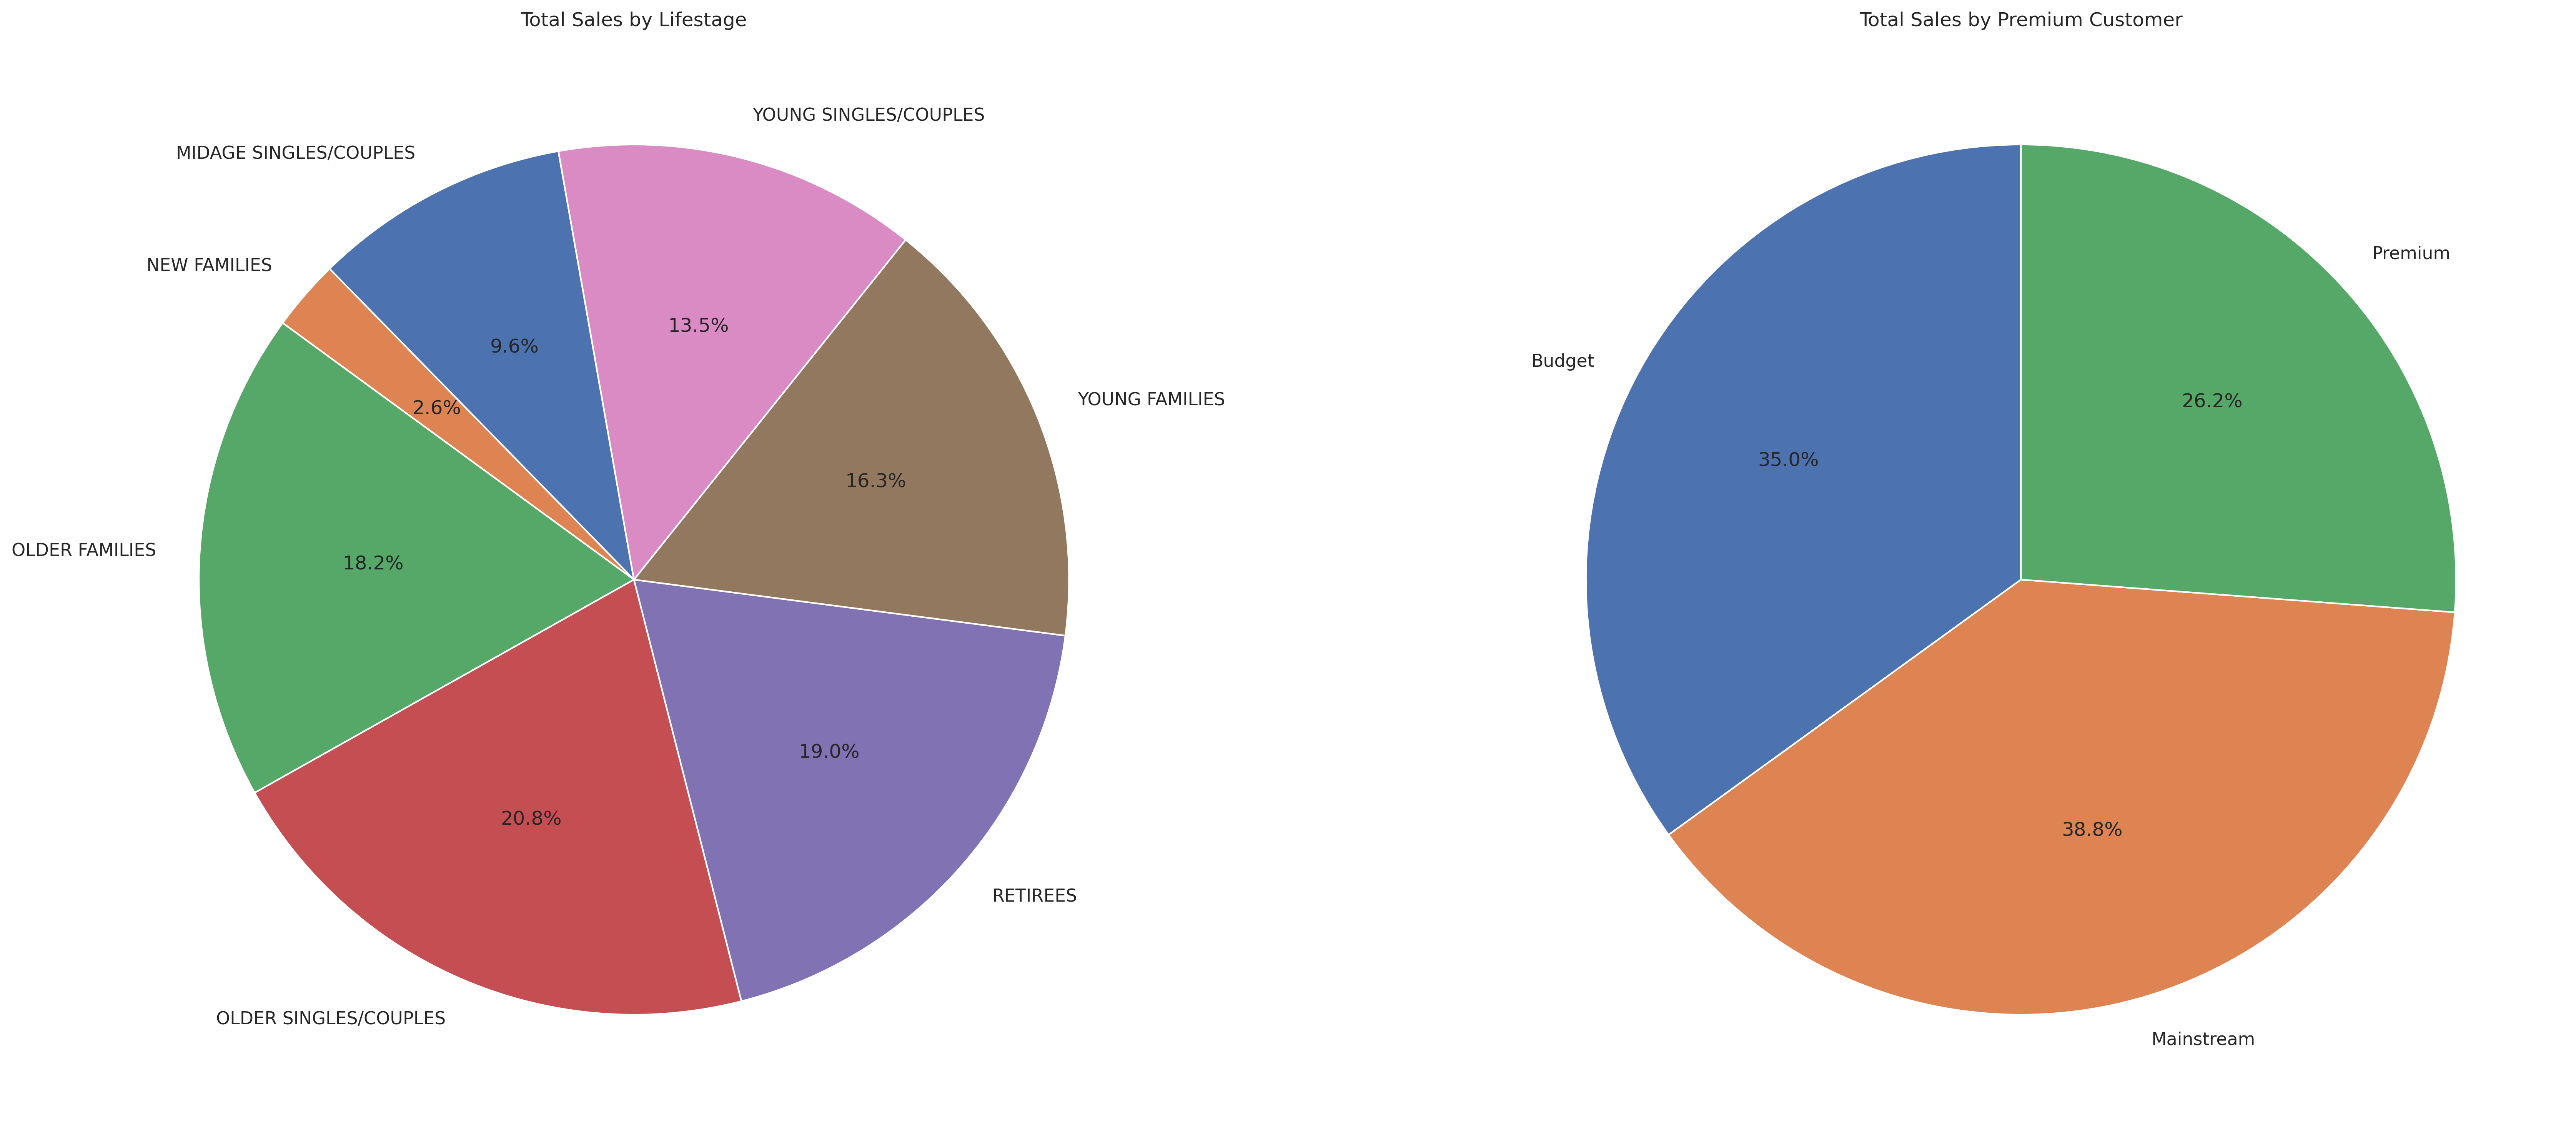

In [48]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25,10)
sales_by_lifestages = df.groupby('LIFESTAGE')['TOT_SALES'].sum()
sales_by_premium_customer = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()

labels1 = sales_by_lifestages.index.to_list()
sizes1 = sales_by_lifestages.values.tolist()

labels2 = sales_by_premium_customer.index.to_list()
sizes2 = sales_by_premium_customer.values.tolist()

fig, axs = plt.subplots(1, 2)

axs[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=100)
axs[0].set_title('Total Sales by Lifestage')

axs[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Total Sales by Premium Customer')

plt.tight_layout()
plt.show()

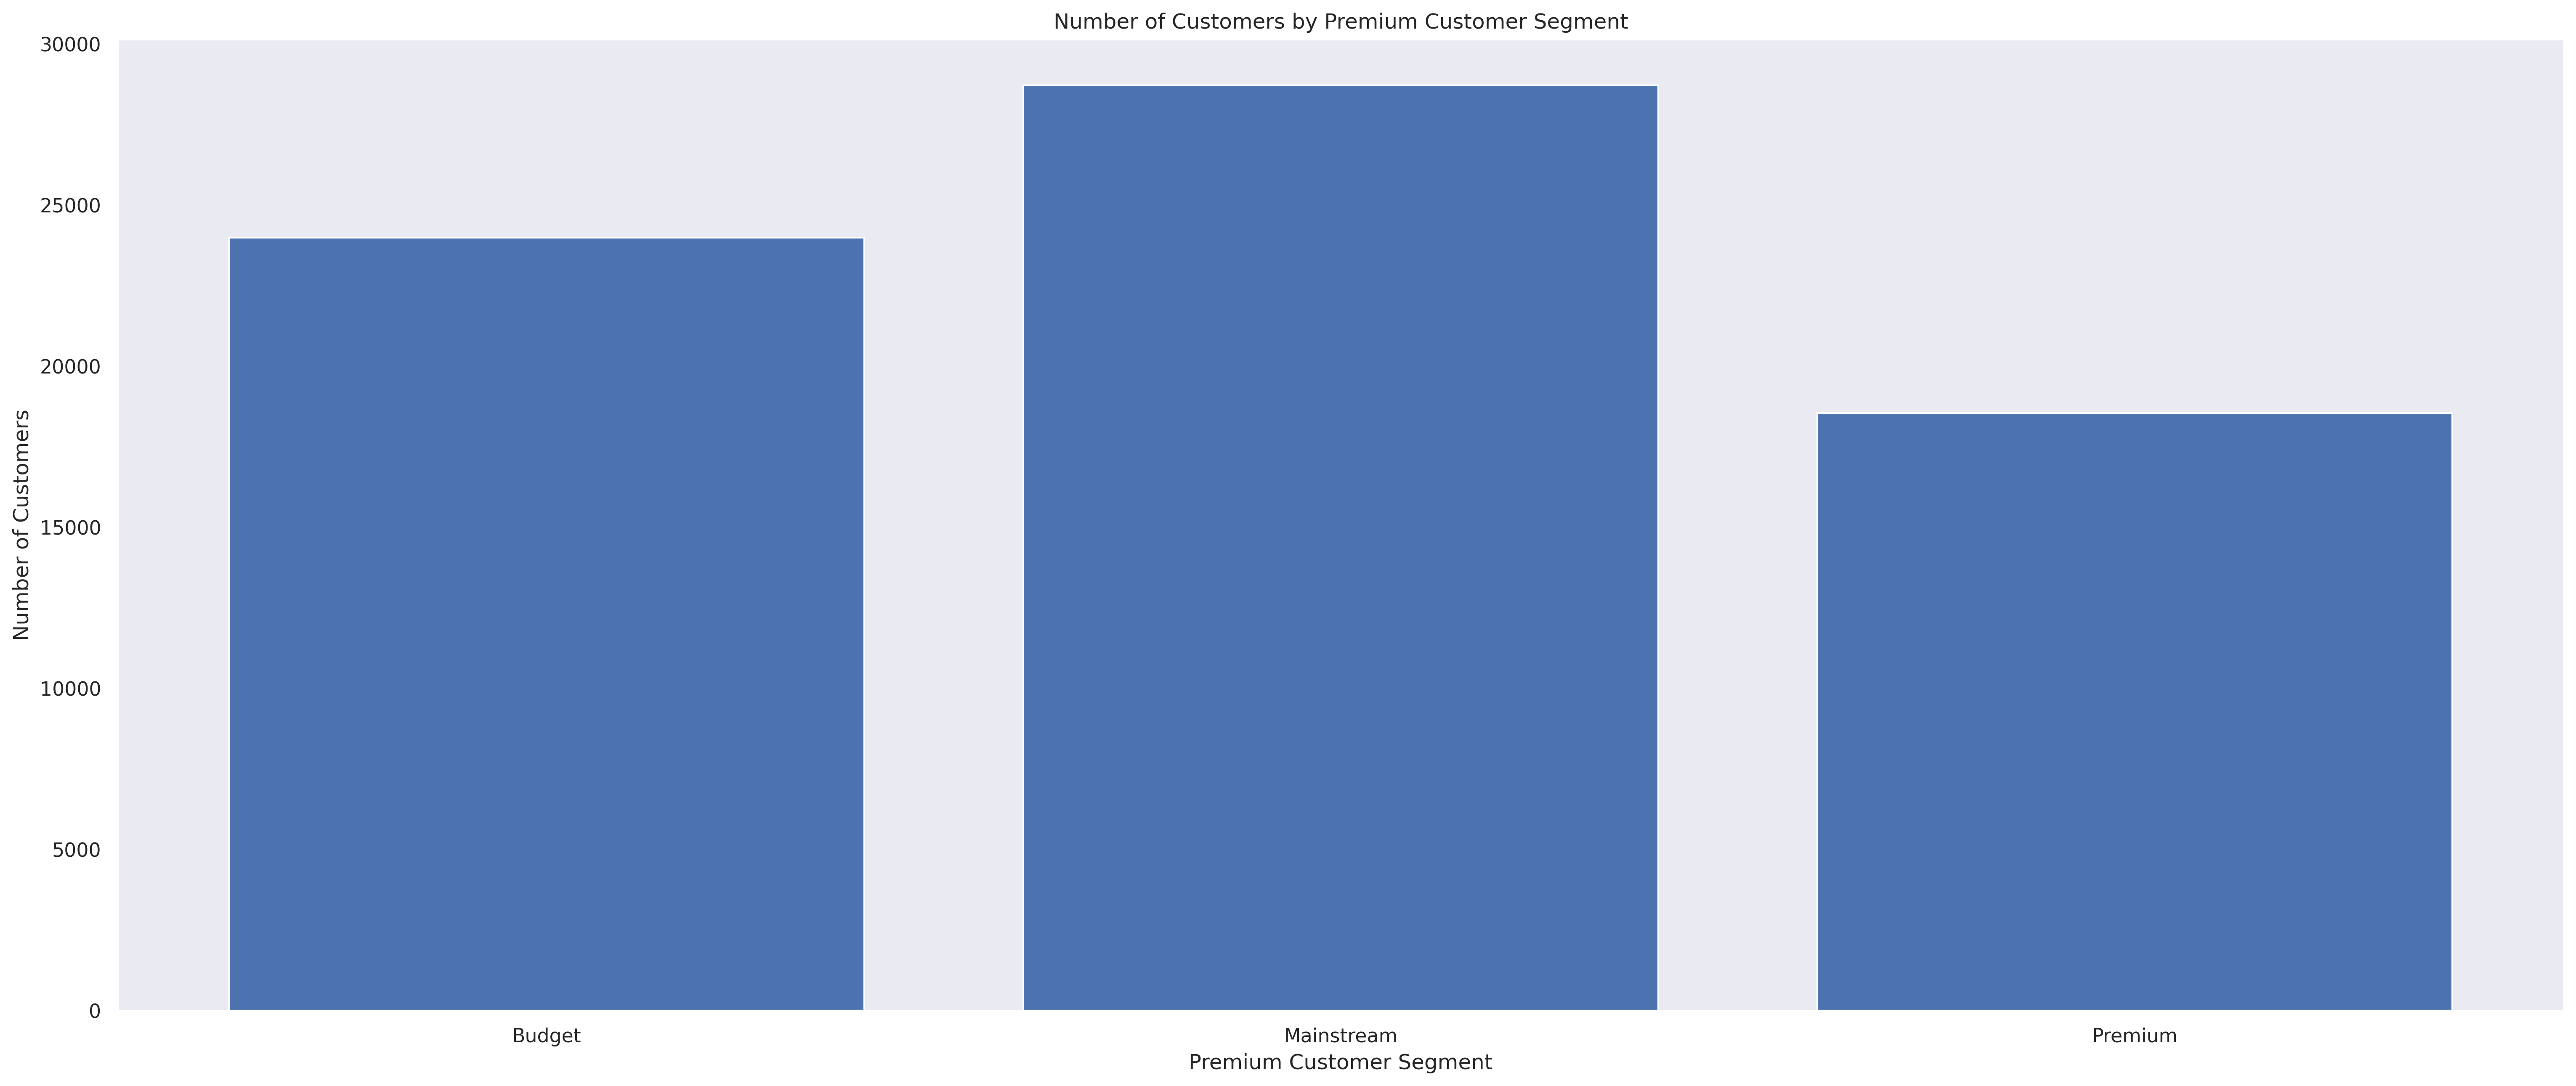

In [49]:
# Count the number of customers in each segment
customer_count_by_segment = df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique()

# Create a bar chart to visualize the number of customers in each segment
plt.bar(customer_count_by_segment.index, customer_count_by_segment.values)
plt.title('Number of Customers by Premium Customer Segment')
plt.xlabel('Premium Customer Segment')
plt.ylabel('Number of Customers')
plt.show()


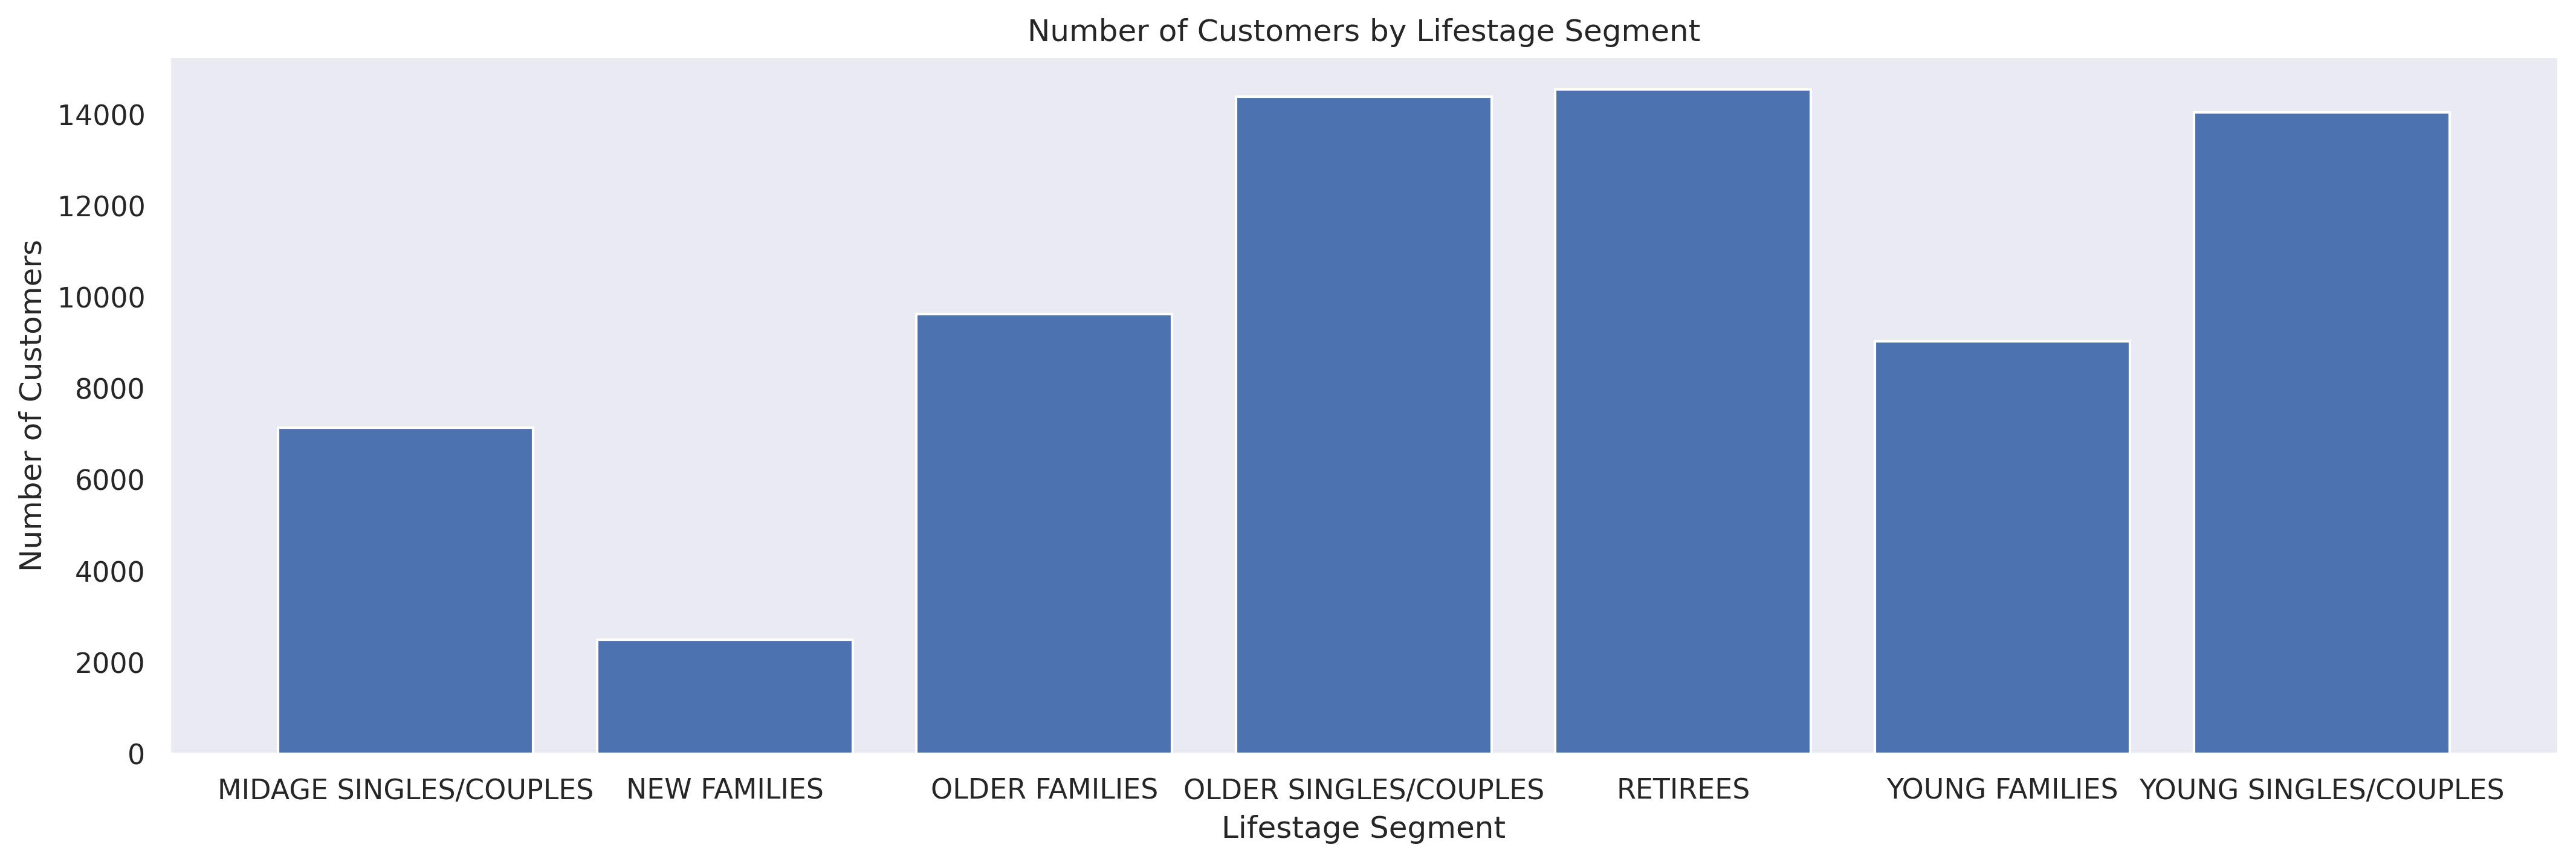

In [50]:

plt.rcParams['figure.figsize'] = (17,5)
# Count the number of customers in each segment
customer_count_by_segment = df.groupby('LIFESTAGE')['LYLTY_CARD_NBR'].nunique()

# Create a bar chart to visualize the number of customers in each segment
plt.bar(customer_count_by_segment.index, customer_count_by_segment.values)
plt.title('Number of Customers by Lifestage Segment')
plt.xlabel('Lifestage Segment')
plt.ylabel('Number of Customers')
plt.show()


<Figure size 3000x1500 with 0 Axes>

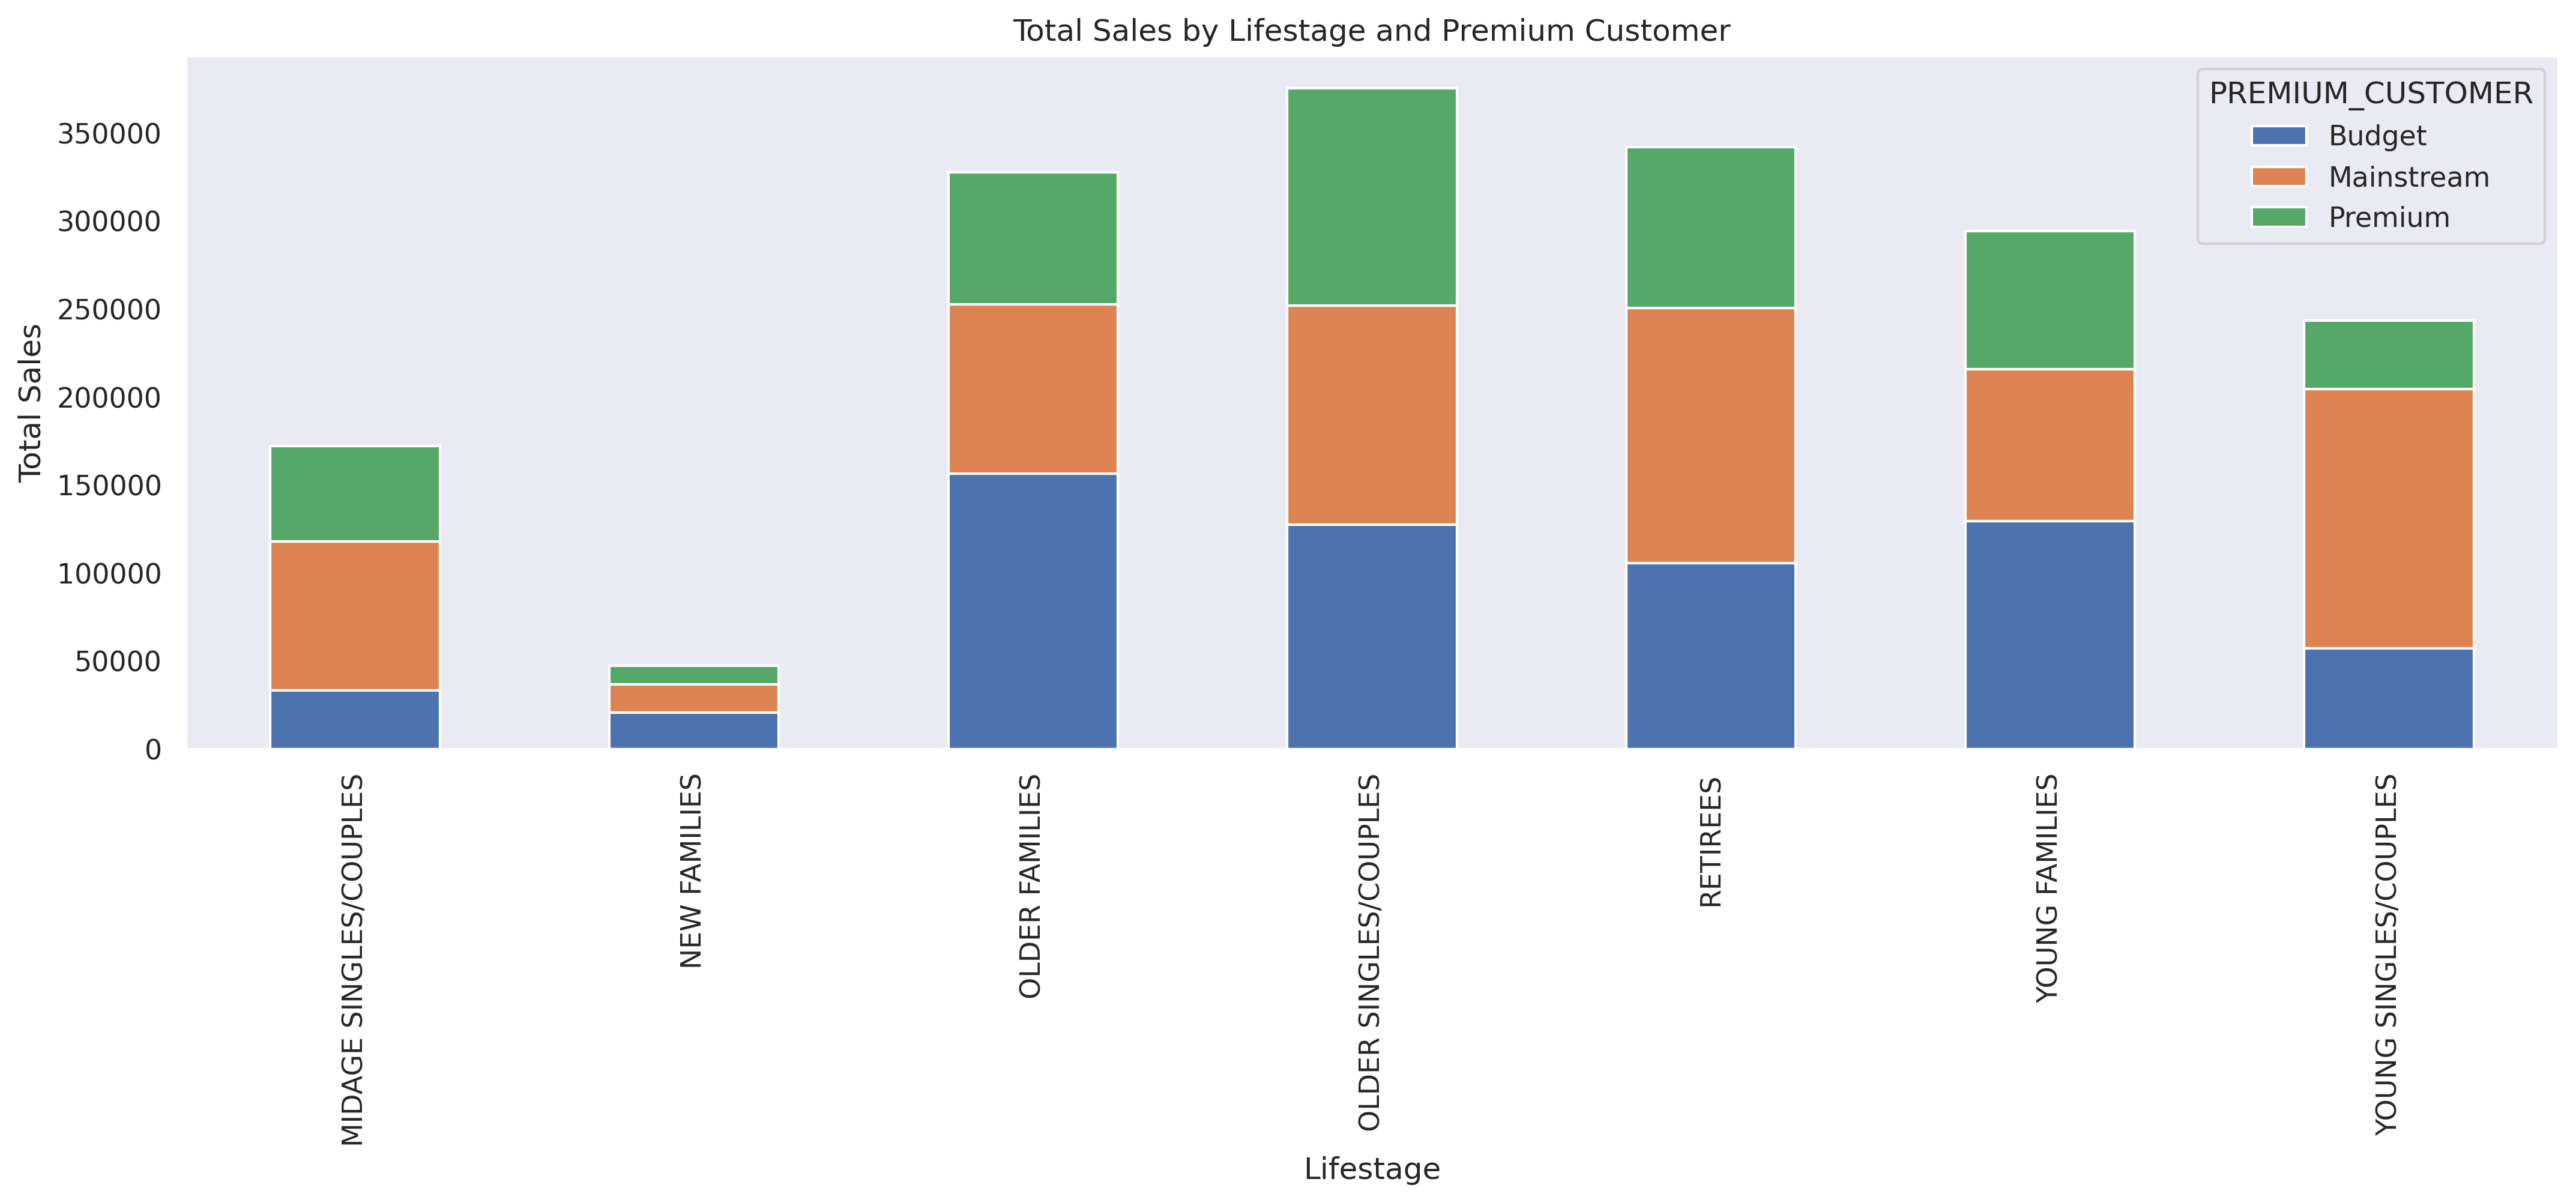

In [51]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_by_segment = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

# Plot the split by LIFESTAGE
plt.figure(figsize=(10, 5))
sales_by_segment.plot(kind='bar', stacked=True)
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.show()



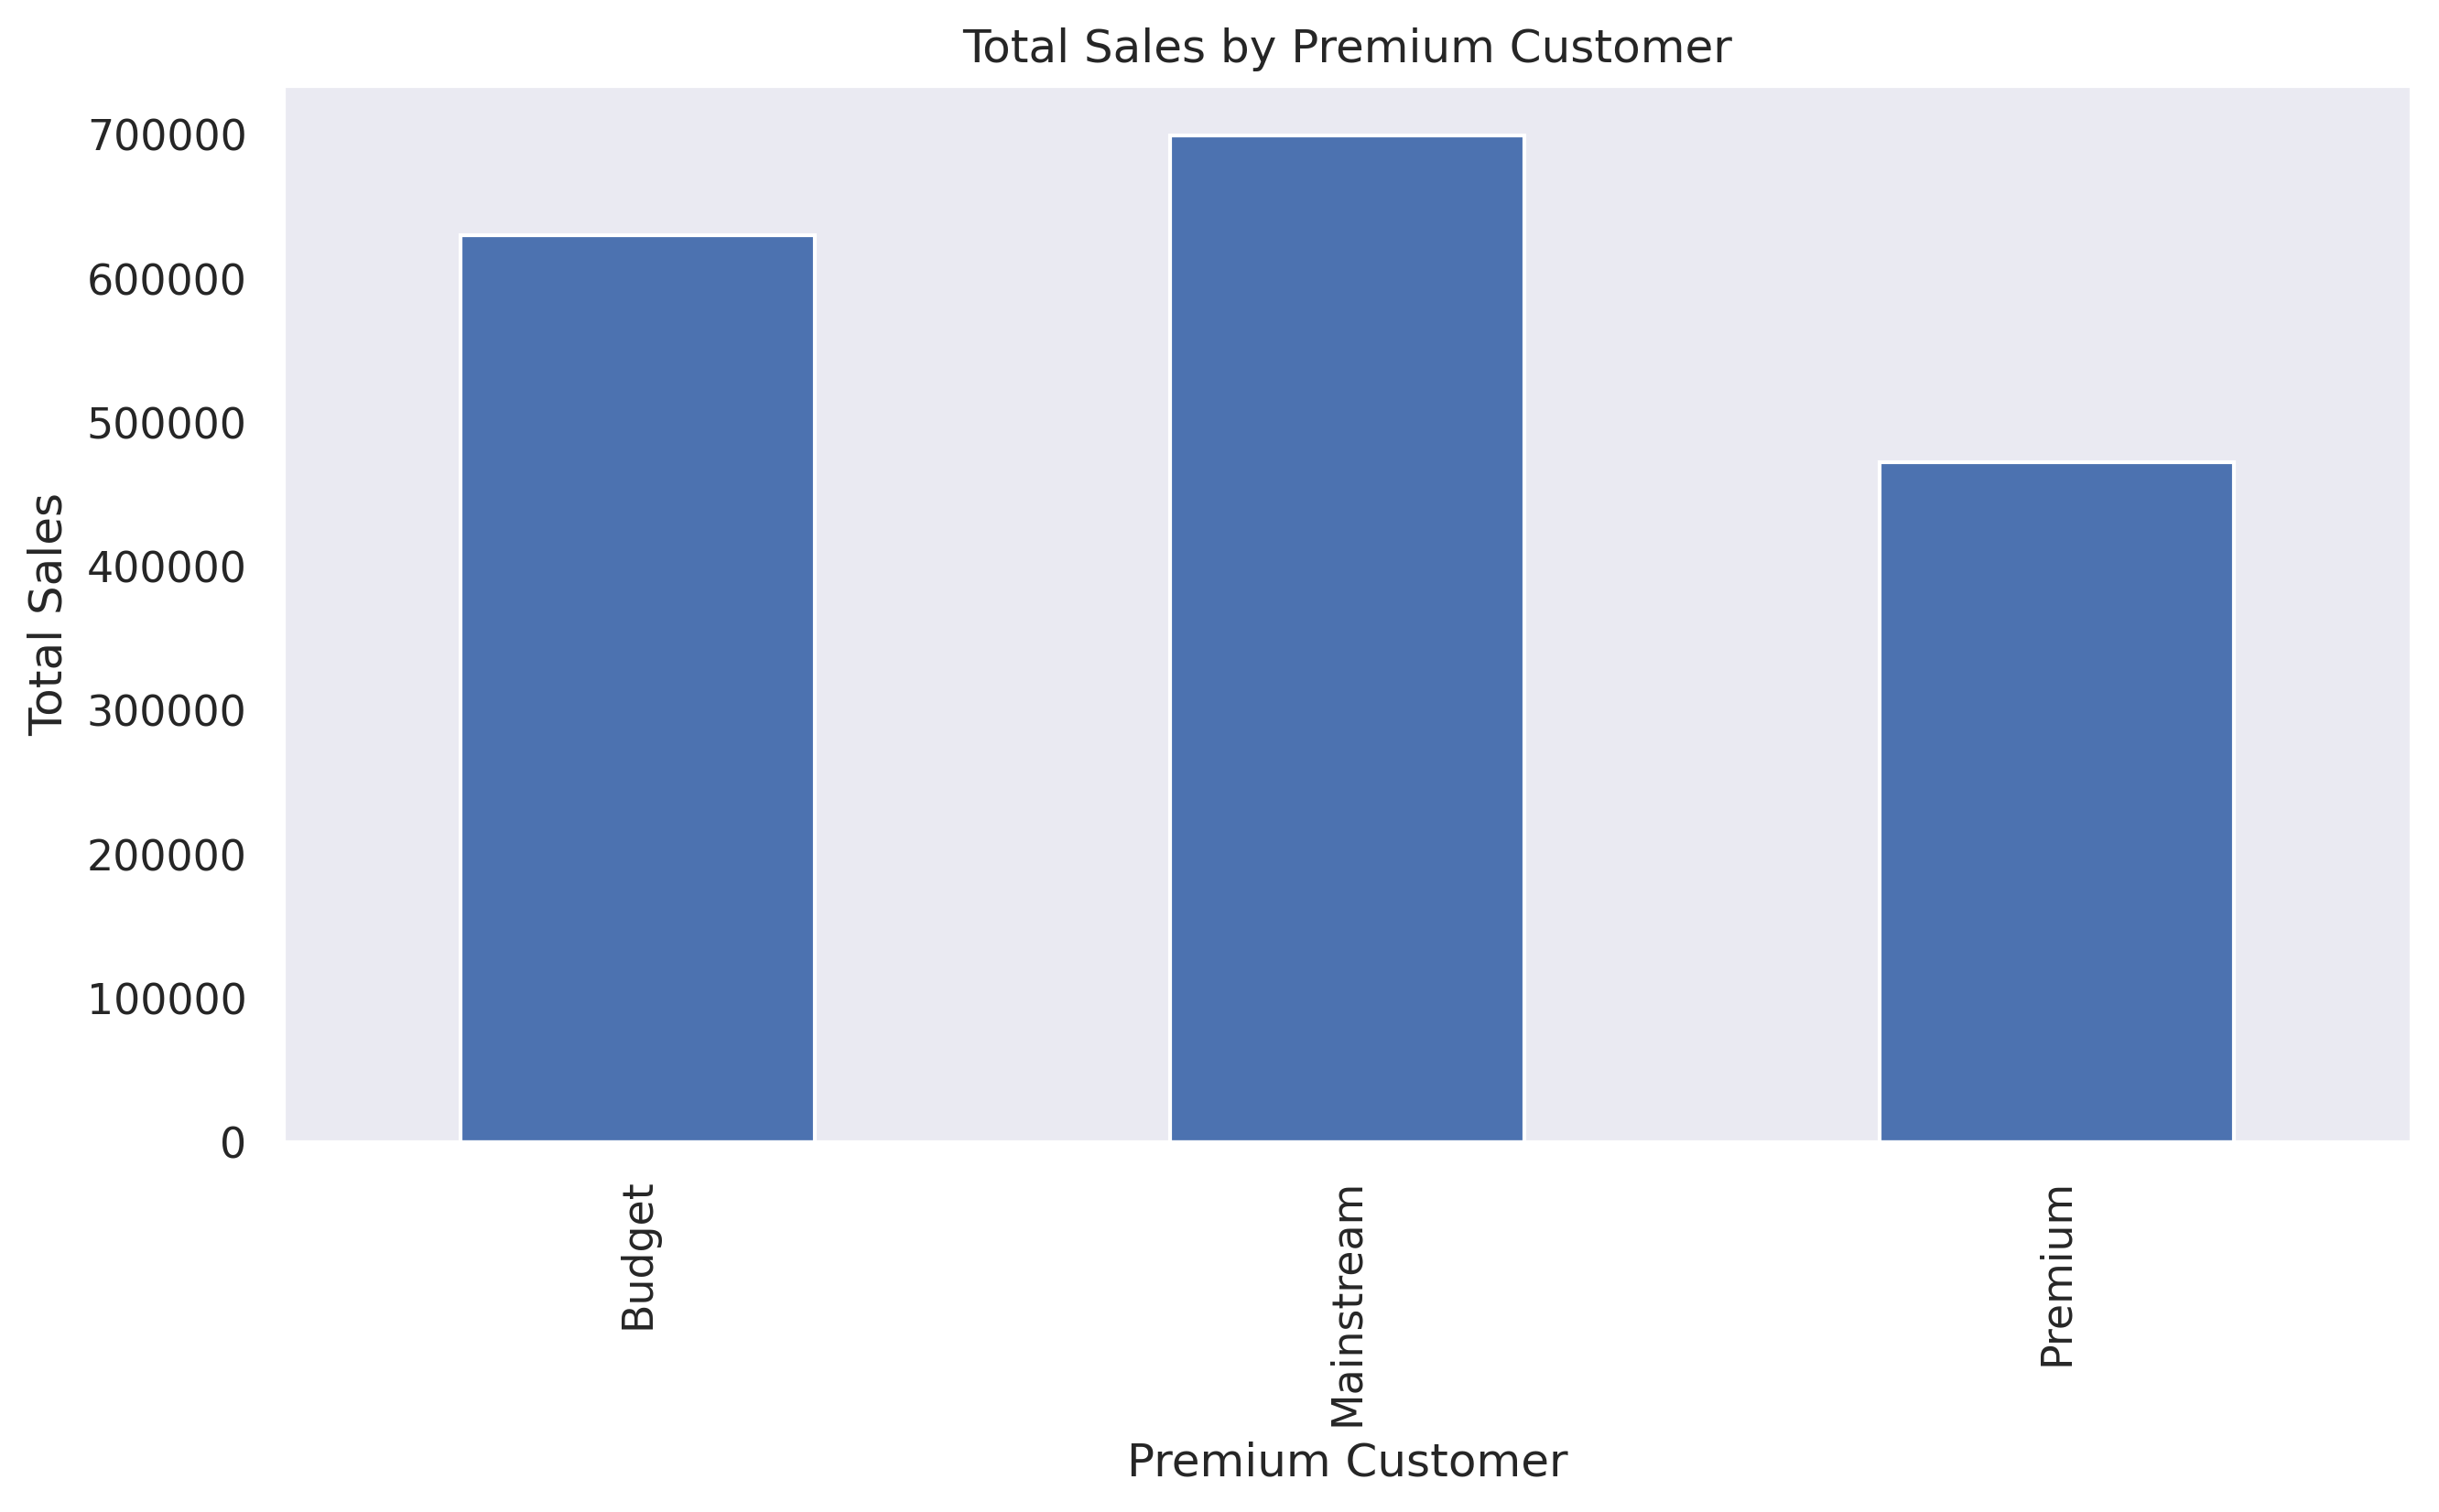

In [52]:
# Plot the split by PREMIUM_CUSTOMER
plt.figure(figsize=(10, 5))
sales_by_segment.sum(axis=0).plot(kind='bar')
plt.title('Total Sales by Premium Customer')
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.show()

# **Quantium Virtual Internship - Retail Strategy and Analytics PART 2**


The client has selected store numbers 77, 86 and 88 as trial stores and want control stores to be established stores that are operational for the entire
observation period.

We would want to match trial stores to control stores that are similar to the trial store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer
Let's first create the metrics of interest and filter to stores that are present
throughout the pre-trial period.

In [53]:
df['YEARMONTH'] = df['DATE'].dt.strftime('%Y%m')      # Adding a new month ID column in the data with the format yyyymm
df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,BRAND_NAME,YEARMONTH
0,1000.0,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,Natural,201810
1,1002.0,2018-09-16,1,2,58,Red Rock Deli ChiknGarlic Aioli 150g,2,2.7,150.0,RRD,YOUNG SINGLES/COUPLES,Mainstream,RED,201809
2,1003.0,2019-03-07,1,3,52,Grain Waves Sour CreamChives 210G,2,3.6,210.0,GRNWVES,YOUNG FAMILIES,Budget,Grain,201903
3,1003.0,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,2,3.0,175.0,NATURAL,YOUNG FAMILIES,Budget,Natural,201903
4,1004.0,2018-11-02,1,5,96,WW Original Stacked Chips 160g,2,1.9,160.0,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,WW,201811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264828,402304.5,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream,Dorito,201808
264829,402304.5,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210.0,GRNWVES,YOUNG FAMILIES,Mainstream,Grain,201812
264830,402304.5,2018-10-01,88,240394,60,Kettle Tortilla ChpsFetaGarlic 150g,2,9.2,150.0,KETTLE,YOUNG FAMILIES,Premium,Kettle,201810
264831,402304.5,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165.0,TYRRELLS,OLDER FAMILIES,Budget,Tyrrells,201810


# **PART 2 under work **

**The measure calculations to use during the analysis.**

 For each store and month total sales, number of customers,transactions per customer, chips per customer and the average price per unit.

In [54]:
# def calculate_metrics(df):
#   # Calculate total sales
#   total_sales = df.groupby(['STORE_NBR', 'YEARMONTH'])['TOT_SALES'].sum()

#   # Calculate number of customers
#   num_customers = df.groupby(['STORE_NBR', 'YEARMONTH'])['LYLTY_CARD_NBR'].nunique()

#   # Calculate transactions per customer
#   transactions_per_customer = df.groupby(['STORE_NBR', 'YEARMONTH'])['TXN_ID'].nunique() / num_customers

#   # Calculate chips per customer
#   chips_per_customer = df.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum() / num_customers

#   # Calculate average price per unit
#   avg_price_per_unit = total_sales / df.groupby(['STORE_NBR', 'YEARMONTH'])['PROD_QTY'].sum()

#   # Create a new DataFrame to store the calculated metrics
#   metrics_df = pd.DataFrame({
#       'total_sales': total_sales,
#       'num_customers': num_customers,
#       'transactions_per_customer': transactions_per_customer,
#       'chips_per_customer': chips_per_customer,
#       'avg_price_per_unit': avg_price_per_unit
#   })

#   return metrics_df

# # Calculate the metrics for the DataFrame
# metrics_df = calculate_metrics(df)

# # Print the metrics DataFrame
# print(metrics_df)

                     total_sales  num_customers  transactions_per_customer  \
STORE_NBR YEARMONTH                                                          
1         201807           188.9             47                   1.042553   
          201808           168.4             41                   1.000000   
          201809           268.1             57                   1.035088   
          201810           175.4             39                   1.025641   
          201811           184.8             44                   1.022727   
...                          ...            ...                        ...   
272       201902           385.3             44                   1.068182   
          201903           421.9             48                   1.062500   
          201904           445.1             54                   1.018519   
          201905           314.6             34                   1.176471   
          201906           301.9             33                 

 **Ranking how similar each potential control store
is to the trial store.**

In [63]:
# def calculate_corr(trial_store, control_store, measure):
#   corr = trial_store[measure].corr(control_store[measure])
#   return corr

In [64]:
# def find_control_stores(inputTable, metricCol, storeComparison):
#   # Calculate correlations between trial store and all other stores
#   correlations = {}
#   for store in inputTable.index.get_level_values('STORE_NBR').unique():
#     if store != storeComparison:
#       correlations[store] = calculate_corr(inputTable.loc[storeComparison], inputTable.loc[store], metricCol)

#   # Rank stores by correlation
#   ranked_stores = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

#   # Return top 3 most correlated stores
#   return ranked_stores[:3]

In [65]:
# def calculate_magnitude_distance(trial_store, control_store, measure):
#   # Calculate the average of the measure for the trial store
#   trial_store_avg = trial_store[measure].mean()

#   # Calculate the average of the measure for the control store
#   control_store_avg = control_store[measure].mean()

#   # Calculate the magnitude distance
#   magnitude_distance = abs(trial_store_avg - control_store_avg)

#   # Return the magnitude distance
#   return magnitude_distance

In [66]:
# def find_closest_control_stores(inputTable, metricCol, storeComparison):
#   # Calculate magnitude distance between trial store and all other stores
#   magnitude_distances = {}
#   for store in inputTable.index.get_level_values('STORE_NBR').unique():
#     if store != storeComparison:
#       magnitude_distances[store] = calculate_magnitude_distance(inputTable.loc[storeComparison], inputTable.loc[store], metricCol)

#   # Rank stores by magnitude distance
#   ranked_stores = sorted(magnitude_distances.items(), key=lambda x: x[1])

#   # Return top 3 closest stores
#   return ranked_stores[:3]

In [67]:
# def calculate_standardised_magnitude_distance(trial_store, control_store, measure):
#   # Calculate the magnitude distance
#   magnitude_distance = calculate_magnitude_distance(trial_store, control_store, measure)

#   # Calculate the range of the measure
#   measure_range = trial_store[measure].max() - trial_store[measure].min()

#   # Calculate the standardised magnitude distance
#   standardised_magnitude_distance = magnitude_distance / measure_range

#   # Return the standardised magnitude distance
#   return standardised_magnitude_distance

In [68]:
# total_customers = df['LYLTY_CARD_NBR'].nunique()
# print(total_customers)

71255
